# Imports

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid', {'legend.frameon':True})
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

# Loads

In [28]:
df = pd.read_csv('csv/train.csv', encoding = 'utf-8')

In [29]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
print('col,not_null,not_null_pc,unique')
for col in df.columns:
    msg = col
    not_null = df[df[col].isnull() == False]
    msg += ',%s,%s,%s'%(len(not_null), np.round(len(not_null) / len(df) * 100, 2), len(df[col].unique()))
    print(msg)

col,not_null,not_null_pc,unique
PassengerId,891,100.0,891
Survived,891,100.0,2
Pclass,891,100.0,3
Name,891,100.0,891
Sex,891,100.0,2
Age,714,80.13,89
SibSp,891,100.0,7
Parch,891,100.0,7
Ticket,891,100.0,681
Fare,891,100.0,248
Cabin,204,22.9,148
Embarked,889,99.78,4


# Deal with missing

## Fill Age NaN

In [31]:
def missing_ages(df):
    for groups in df.drop(df[df['Age'].isnull()].index).groupby(['Pclass', 'Sex'])['Age'].median().items():
        for rows in df[df['Age'].isnull()].iterrows():
            if rows[1]['Pclass'] == groups[0][0] and rows[1]['Sex'] == groups[0][1]:
                df.loc[rows[0], 'Age'] = groups[1]

missing_ages(df)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Drop Embarked missing

In [32]:
df = df.dropna(subset=['Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


# Extract Title

In [33]:
df['Title'] = df['Name'].apply(lambda x: str(x).split('.')[0].split(' ')[-1])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
Title          889 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 97.2+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


# Create Family

In [34]:
df['family'] = df['SibSp'] + df['Parch']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
Title          889 non-null object
family         889 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 104.2+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


# Band continuous

In [35]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df['FareBand'] = pd.cut(df['Fare'], 5)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
Title          889 non-null object
family         889 non-null int64
AgeBand        889 non-null category
FareBand       889 non-null category
dtypes: category(2), float64(2), int64(6), object(6)
memory usage: 106.4+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,"(16.336, 32.252]","(-0.512, 102.466]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,"(32.252, 48.168]","(-0.512, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,"(16.336, 32.252]","(-0.512, 102.466]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,"(32.252, 48.168]","(-0.512, 102.466]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,"(32.252, 48.168]","(-0.512, 102.466]"


# Encode Categorical

In [36]:
for col in ['Sex', 'Embarked', 'Title', 'AgeBand', 'FareBand']:
    df[col] = pd.Categorical(df[col]).codes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null int8
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null int8
Title          889 non-null int8
family         889 non-null int64
AgeBand        889 non-null int8
FareBand       889 non-null int8
dtypes: float64(2), int64(6), int8(5), object(3)
memory usage: 87.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,12,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,13,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,9,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,13,1,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,12,0,2,0


# Select

In [37]:
features = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
features.info()
features.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int8
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null int8
Title       889 non-null int8
family      889 non-null int64
AgeBand     889 non-null int8
FareBand    889 non-null int8
dtypes: float64(2), int64(5), int8(5)
memory usage: 59.9 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family,AgeBand,FareBand
0,0,3,1,22.0,1,0,7.2500,2,12,1,1,0
1,1,1,0,38.0,1,0,71.2833,0,13,1,2,0
2,1,3,0,26.0,0,0,7.9250,2,9,0,1,0
3,1,1,0,35.0,1,0,53.1000,2,13,1,2,0
4,0,3,1,35.0,0,0,8.0500,2,12,0,2,0


# Correlation

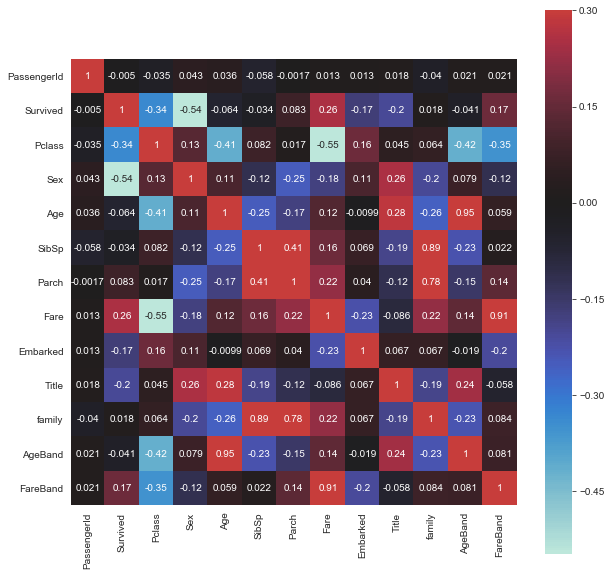

In [38]:
corr = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=.3, square=True, annot=True, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show(ax)

# Linear Regression 

In [39]:
def lin_model(df): 
    print('******* Splits lengths *******')
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis=1), df['Survived'], test_size = 0.2, random_state=5)
    print('train length : %s, test length : %s'%(len(X_train), len(X_test)))
    print('******************************')
    
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    print('coef : %s'%reg.coef_)
    print('ms_error : %s'%mean_squared_error(y_test, y_pred))
    print('r2 : %s'%r2_score(y_test, y_pred))
    
    to_plot = pd.DataFrame([[y_test.to_numpy()[i], y_pred[i]] for i in range(len(y_test))], columns = ['test', 'pred'])
    to_plot = to_plot.sort_values('test')
    
    plt.plot(list(range(len(to_plot))), to_plot['test'])
    plt.plot(list(range(len(to_plot))), to_plot['pred'])
    
    print('******************************')
    return reg

******* Splits lengths *******
train length : 711, test length : 178
******************************
coef : [-1.57527864e-01 -4.55856396e-01 -5.76059824e-03 -2.57101596e-02
 -4.49160489e-04  2.29782924e-03 -3.48935313e-02 -1.23082373e-02
 -2.61593201e-02 -1.00719606e-02 -2.33108140e-01]
ms_error : 0.11942652953651617
r2 : 0.4610582307598664
******************************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

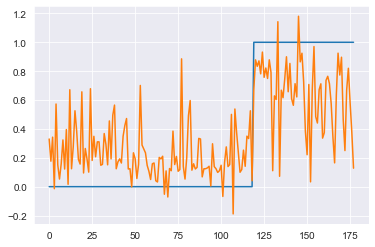

In [40]:
lin_model(features)

# Logisitic Regression

In [41]:
def log_model(df, random_stat=5, C=1e5, solver='lbfgs'):
    print('******* Splits lengths *******')
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis=1), df['Survived'], test_size = 0.2, random_state=5)
    print('train length : %s, test length : %s'%(len(X_train), len(X_test)))
    print('******************************\n\n')

    clf = LogisticRegression(C=C, solver=solver)
    clf.fit(X_train, y_train)
    pred =  clf.predict(X_test)
    
    print('*********** Score ************')
    print('Score : %s'%(clf.score(X_test, y_test)))
    print('******************************\n\n')

    
    print('****** Confusion matrix ******')
    M = confusion_matrix(y_test, pred)
    m = [i for i in range(0, len(df['Survived'].unique()))]
    print(pd.DataFrame(M, index=m, columns=m))
    print('******************************\n\n')
    
    print('******* Sklearn Report *******')
    print(classification_report(y_test, pred)) 
    print('******************************\n\n')
    
    print('******* ROC AUC SCORE *******')
    print(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))
    print('******************************\n\n')

    return clf

In [42]:
log_model(features)

******* Splits lengths *******
train length : 711, test length : 178
******************************


*********** Score ************
Score : 0.8539325842696629
******************************


****** Confusion matrix ******
     0   1
0  107  12
1   14  45
******************************


******* Sklearn Report *******
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       119
           1       0.79      0.76      0.78        59

    accuracy                           0.85       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.85      0.85      0.85       178

******************************


******* ROC AUC SCORE *******
0.8803589232303091
******************************




C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(features.drop(['Survived'], axis=1), features['Survived'], test_size = 0.2, random_state=5)
rfe=RFE(SVR(kernel="linear"),n_features_to_select=1)
names=X_train.columns.tolist()
rfe.fit(X_train,y_train)
print("Features triées par leurs rangs ")
print(sorted(zip(map(lambda x: round(x,4),rfe.ranking_),names)))

Features triées par leurs rangs 
[(1, 'Sex'), (2, 'FareBand'), (3, 'family'), (4, 'AgeBand'), (5, 'Parch'), (6, 'Embarked'), (7, 'Pclass'), (8, 'Age'), (9, 'SibSp'), (10, 'Title'), (11, 'Fare')]


In [44]:
import itertools
def bruteforce(df):
    features = df.drop(['Survived'], axis=1)
    target = df['Survived']
    
    combs = []
    for i in range(2, len(features.columns)):
        for comb in itertools.combinations(features, i):
            combs.append(comb)
    
    rows = []
    for i in range(len(combs)):
        X_train, X_test, y_train, y_test = train_test_split(features[list(combs[i])], target, test_size = 0.2, random_state=5)
        clf = LogisticRegression()
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        M = confusion_matrix(y_test, pred)
        rows.append([combs[i], clf.score(X_test, y_test), roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), M[0,1], M[1,0]])
        print('%s/%s - %s'%(i, len(combs), i/len(combs)*100))
    return rows

In [45]:
result = pd.DataFrame(bruteforce(features), columns=['comb', 'score', 'auc', 'fp', 'tn'])

0/2035 - 0.0
1/2035 - 0.04914004914004914
2/2035 - 0.09828009828009827
3/2035 - 0.14742014742014742
4/2035 - 0.19656019656019655
5/2035 - 0.2457002457002457
6/2035 - 0.29484029484029484
7/2035 - 0.343980343980344
8/2035 - 0.3931203931203931
9/2035 - 0.4422604422604423
10/2035 - 0.4914004914004914
11/2035 - 0.5405405405405406
12/2035 - 0.5896805896805897
13/2035 - 0.6388206388206389
14/2035 - 0.687960687960688
15/2035 - 0.7371007371007371

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


16/2035 - 0.7862407862407862
17/2035 - 0.8353808353808353
18/2035 - 0.8845208845208846
19/2035 - 0.9336609336609337
20/2035 - 0.9828009828009828
21/2035 - 1.0319410319410318
22/2035 - 1.0810810810810811
23/2035 - 1.1302211302211302
24/2035 - 1.1793611793611793
25/2035 - 1.2285012285012284
26/2035 - 1.2776412776412778
27/2035 - 1.3267813267813269
28/2035 - 1.375921375921376
29/2035 - 1.425061425061425
30/2035 - 1.4742014742014742
31/2035 - 1.5233415233415233
32/2035 - 1.5724815724815724
33/2035 - 1.6216216216216217
34/2035 - 1.6707616707616706
35/2035 - 1.71990171990172

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


36/2035 - 1.7690417690417692
37/2035 - 1.8181818181818181
38/2035 - 1.8673218673218674
39/2035 - 1.9164619164619165
40/2035 - 1.9656019656019657
41/2035 - 2.0147420147420148
42/2035 - 2.0638820638820636
43/2035 - 2.113022113022113
44/2035 - 2.1621621621621623
45/2035 - 2.211302211302211
46/2035 - 2.2604422604422605
47/2035 - 2.30958230958231
48/2035 - 2.3587223587223587
49/2035 - 2.407862407862408
50/2035 - 2.457002457002457
51/2035 - 2.506142506142506
52/2035 - 2.5552825552825555
53/2035 - 2.6044226044226044
54/2035 - 2.6535626535626538
55/2035 - 2.7027027027027026


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

56/2035 - 2.751842751842752
57/2035 - 2.800982800982801
58/2035 - 2.85012285012285
59/2035 - 2.899262899262899
60/2035 - 2.9484029484029484
61/2035 - 2.9975429975429972
62/2035 - 3.0466830466830466
63/2035 - 3.095823095823096
64/2035 - 3.1449631449631448
65/2035 - 3.194103194103194
66/2035 - 3.2432432432432434
67/2035 - 3.2923832923832927
68/2035 - 3.341523341523341
69/2035 - 3.3906633906633905
70/2035 - 3.43980343980344
71/2035 - 3.488943488943489
72/2035 - 3.5380835380835385
73/2035 - 3.587223587223587
74/2035 - 3.6363636363636362
75/2035 - 3.6855036855036856
76/2035 - 3.734643734643735
77/2035 - 3.783783783783784
78/2035 - 3.832923832923833

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


79/2035 - 3.882063882063882
80/2035 - 3.9312039312039313
81/2035 - 3.98034398034398
82/2035 - 4.0294840294840295
83/2035 - 4.078624078624079
84/2035 - 4.127764127764127
85/2035 - 4.176904176904177
86/2035 - 4.226044226044226
87/2035 - 4.275184275184276
88/2035 - 4.324324324324325
89/2035 - 4.3734643734643734
90/2035 - 4.422604422604422
91/2035 - 4.471744471744472
92/2035 - 4.520884520884521

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


93/2035 - 4.57002457002457
94/2035 - 4.61916461916462
95/2035 - 4.668304668304668
96/2035 - 4.717444717444717
97/2035 - 4.766584766584766
98/2035 - 4.815724815724816
99/2035 - 4.864864864864865
100/2035 - 4.914004914004914
101/2035 - 4.963144963144963
102/2035 - 5.012285012285012
103/2035 - 5.061425061425061
104/2035 - 5.110565110565111

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


105/2035 - 5.159705159705159
106/2035 - 5.208845208845209
107/2035 - 5.257985257985258
108/2035 - 5.3071253071253075
109/2035 - 5.356265356265356
110/2035 - 5.405405405405405
111/2035 - 5.454545454545454
112/2035 - 5.503685503685504
113/2035 - 5.552825552825553
114/2035 - 5.601965601965602
115/2035 - 5.651105651105651
116/2035 - 5.7002457002457
117/2035 - 5.749385749385749
118/2035 - 5.798525798525798
119/2035 - 5.847665847665848

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


120/2035 - 5.896805896805897
121/2035 - 5.9459459459459465
122/2035 - 5.9950859950859945
123/2035 - 6.044226044226044
124/2035 - 6.093366093366093
125/2035 - 6.142506142506143
126/2035 - 6.191646191646192
127/2035 - 6.240786240786241
128/2035 - 6.2899262899262895
129/2035 - 6.339066339066339
130/2035 - 6.388206388206388
131/2035 - 6.437346437346438
132/2035 - 6.486486486486487
133/2035 - 6.535626535626536
134/2035 - 6.5847665847665855
135/2035 - 6.6339066339066335
136/2035 - 6.683046683046682
137/2035 - 6.732186732186732

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


138/2035 - 6.781326781326781
139/2035 - 6.830466830466831
140/2035 - 6.87960687960688
141/2035 - 6.9287469287469285
142/2035 - 6.977886977886978
143/2035 - 7.027027027027027
144/2035 - 7.076167076167077
145/2035 - 7.125307125307126
146/2035 - 7.174447174447174
147/2035 - 7.223587223587223
148/2035 - 7.2727272727272725
149/2035 - 7.321867321867321
150/2035 - 7.371007371007371
151/2035 - 7.42014742014742
152/2035 - 7.46928746928747
153/2035 - 7.518427518427519
154/2035 - 7.567567567567568

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


155/2035 - 7.616707616707617
156/2035 - 7.665847665847666
157/2035 - 7.714987714987714
158/2035 - 7.764127764127764
159/2035 - 7.813267813267813
160/2035 - 7.862407862407863
161/2035 - 7.9115479115479115
162/2035 - 7.96068796068796
163/2035 - 8.00982800982801
164/2035 - 8.058968058968059
165/2035 - 8.108108108108109
166/2035 - 8.157248157248159
167/2035 - 8.206388206388207
168/2035 - 8.255528255528255

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


169/2035 - 8.304668304668304
170/2035 - 8.353808353808354
171/2035 - 8.402948402948402
172/2035 - 8.452088452088452
173/2035 - 8.501228501228502
174/2035 - 8.550368550368551
175/2035 - 8.5995085995086
176/2035 - 8.64864864864865
177/2035 - 8.697788697788699
178/2035 - 8.746928746928747
179/2035 - 8.796068796068795
180/2035 - 8.845208845208845
181/2035 - 8.894348894348894
182/2035 - 8.943488943488944
183/2035 - 8.992628992628992
184/2035 - 9.041769041769042
185/2035 - 9.090909090909092

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


186/2035 - 9.14004914004914
187/2035 - 9.18918918918919
188/2035 - 9.23832923832924
189/2035 - 9.287469287469287
190/2035 - 9.336609336609335
191/2035 - 9.385749385749385
192/2035 - 9.434889434889435
193/2035 - 9.484029484029485
194/2035 - 9.533169533169533
195/2035 - 9.582309582309582
196/2035 - 9.631449631449632
197/2035 - 9.680589680589682
198/2035 - 9.72972972972973
199/2035 - 9.77886977886978
200/2035 - 9.828009828009828
201/2035 - 9.877149877149877
202/2035 - 9.926289926289925
203/2035 - 9.975429975429975

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


204/2035 - 10.024570024570025
205/2035 - 10.073710073710075
206/2035 - 10.122850122850123
207/2035 - 10.171990171990172
208/2035 - 10.221130221130222
209/2035 - 10.27027027027027
210/2035 - 10.319410319410318
211/2035 - 10.368550368550368
212/2035 - 10.417690417690418
213/2035 - 10.466830466830466
214/2035 - 10.515970515970515
215/2035 - 10.565110565110565
216/2035 - 10.614250614250615
217/2035 - 10.663390663390663
218/2035 - 10.712530712530713
219/2035 - 10.761670761670763
220/2035 - 10.81081081081081
221/2035 - 10.859950859950859


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

222/2035 - 10.909090909090908
223/2035 - 10.958230958230958
224/2035 - 11.007371007371008
225/2035 - 11.056511056511056
226/2035 - 11.105651105651106
227/2035 - 11.154791154791155
228/2035 - 11.203931203931203
229/2035 - 11.253071253071253
230/2035 - 11.302211302211303
231/2035 - 11.351351351351353
232/2035 - 11.4004914004914
233/2035 - 11.449631449631449
234/2035 - 11.498771498771498
235/2035 - 11.547911547911548
236/2035 - 11.597051597051596
237/2035 - 11.646191646191646
238/2035 - 11.695331695331696
239/2035 - 11.744471744471745
240/2035 - 11.793611793611793
241/2035 - 11.842751842751843
242/2035 - 11.891891891891893

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


243/2035 - 11.941031941031941
244/2035 - 11.990171990171989
245/2035 - 12.039312039312039
246/2035 - 12.088452088452089
247/2035 - 12.137592137592138
248/2035 - 12.186732186732186
249/2035 - 12.235872235872236
250/2035 - 12.285012285012286
251/2035 - 12.334152334152334
252/2035 - 12.383292383292384
253/2035 - 12.432432432432433
254/2035 - 12.481572481572481
255/2035 - 12.530712530712531
256/2035 - 12.579852579852579
257/2035 - 12.62899262899263
258/2035 - 12.678132678132679
259/2035 - 12.727272727272727
260/2035 - 12.776412776412776
261/2035 - 12.825552825552824
262/2035 - 12.874692874692876

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


263/2035 - 12.923832923832922
264/2035 - 12.972972972972974
265/2035 - 13.022113022113022
266/2035 - 13.071253071253071
267/2035 - 13.12039312039312
268/2035 - 13.169533169533171
269/2035 - 13.218673218673219
270/2035 - 13.267813267813267
271/2035 - 13.316953316953317
272/2035 - 13.366093366093365
273/2035 - 13.415233415233416
274/2035 - 13.464373464373464
275/2035 - 13.513513513513514
276/2035 - 13.562653562653562


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

277/2035 - 13.611793611793614
278/2035 - 13.660933660933662
279/2035 - 13.710073710073711
280/2035 - 13.75921375921376
281/2035 - 13.808353808353807
282/2035 - 13.857493857493857
283/2035 - 13.906633906633905
284/2035 - 13.955773955773957
285/2035 - 14.004914004914005
286/2035 - 14.054054054054054
287/2035 - 14.103194103194102
288/2035 - 14.152334152334154
289/2035 - 14.201474201474202
290/2035 - 14.250614250614252
291/2035 - 14.2997542997543
292/2035 - 14.348894348894348


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

293/2035 - 14.398034398034397
294/2035 - 14.447174447174445
295/2035 - 14.496314496314497
296/2035 - 14.545454545454545
297/2035 - 14.594594594594595
298/2035 - 14.643734643734643
299/2035 - 14.692874692874694
300/2035 - 14.742014742014742
301/2035 - 14.791154791154792
302/2035 - 14.84029484029484
303/2035 - 14.889434889434888
304/2035 - 14.93857493857494
305/2035 - 14.987714987714988
306/2035 - 15.036855036855037
307/2035 - 15.085995085995085


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

308/2035 - 15.135135135135137
309/2035 - 15.184275184275183
310/2035 - 15.233415233415235
311/2035 - 15.282555282555283
312/2035 - 15.331695331695332
313/2035 - 15.38083538083538
314/2035 - 15.429975429975428
315/2035 - 15.47911547911548
316/2035 - 15.528255528255528
317/2035 - 15.577395577395578
318/2035 - 15.626535626535626
319/2035 - 15.675675675675677
320/2035 - 15.724815724815725
321/2035 - 15.773955773955775
322/2035 - 15.823095823095823
323/2035 - 15.872235872235873
324/2035 - 15.92137592137592


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

325/2035 - 15.970515970515969
326/2035 - 16.01965601965602
327/2035 - 16.06879606879607
328/2035 - 16.117936117936118
329/2035 - 16.167076167076168
330/2035 - 16.216216216216218
331/2035 - 16.265356265356264
332/2035 - 16.314496314496317
333/2035 - 16.363636363636363
334/2035 - 16.412776412776413
335/2035 - 16.461916461916463
336/2035 - 16.51105651105651


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

337/2035 - 16.56019656019656
338/2035 - 16.60933660933661
339/2035 - 16.65847665847666
340/2035 - 16.707616707616708
341/2035 - 16.756756756756758
342/2035 - 16.805896805896804
343/2035 - 16.855036855036857
344/2035 - 16.904176904176904
345/2035 - 16.953316953316953
346/2035 - 17.002457002457003
347/2035 - 17.05159705159705
348/2035 - 17.100737100737103
349/2035 - 17.14987714987715
350/2035 - 17.1990171990172
351/2035 - 17.24815724815725
352/2035 - 17.2972972972973
353/2035 - 17.346437346437344
354/2035 - 17.395577395577398
355/2035 - 17.444717444717444

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


356/2035 - 17.493857493857494
357/2035 - 17.542997542997544
358/2035 - 17.59213759213759
359/2035 - 17.641277641277643
360/2035 - 17.69041769041769
361/2035 - 17.73955773955774
362/2035 - 17.78869778869779
363/2035 - 17.83783783783784
364/2035 - 17.88697788697789
365/2035 - 17.936117936117938
366/2035 - 17.985257985257984
367/2035 - 18.034398034398034
368/2035 - 18.083538083538084
369/2035 - 18.13267813267813
370/2035 - 18.181818181818183
371/2035 - 18.23095823095823
372/2035 - 18.28009828009828
373/2035 - 18.32923832923833
374/2035 - 18.37837837837838
375/2035 - 18.42751842751843

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


376/2035 - 18.47665847665848
377/2035 - 18.525798525798525
378/2035 - 18.574938574938574
379/2035 - 18.624078624078624
380/2035 - 18.67321867321867
381/2035 - 18.722358722358724
382/2035 - 18.77149877149877
383/2035 - 18.82063882063882
384/2035 - 18.86977886977887
385/2035 - 18.91891891891892
386/2035 - 18.96805896805897
387/2035 - 19.01719901719902
388/2035 - 19.066339066339065
389/2035 - 19.115479115479115
390/2035 - 19.164619164619165
391/2035 - 19.213759213759214
392/2035 - 19.262899262899264


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

393/2035 - 19.31203931203931
394/2035 - 19.361179361179364
395/2035 - 19.41031941031941
396/2035 - 19.45945945945946
397/2035 - 19.50859950859951
398/2035 - 19.55773955773956
399/2035 - 19.606879606879605
400/2035 - 19.656019656019655
401/2035 - 19.705159705159705
402/2035 - 19.754299754299755
403/2035 - 19.803439803439804
404/2035 - 19.85257985257985
405/2035 - 19.901719901719904
406/2035 - 19.95085995085995
407/2035 - 20.0
408/2035 - 20.04914004914005
409/2035 - 20.0982800982801
410/2035 - 20.14742014742015
411/2035 - 20.196560196560196

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


412/2035 - 20.245700245700245
413/2035 - 20.294840294840295
414/2035 - 20.343980343980345
415/2035 - 20.39312039312039
416/2035 - 20.442260442260444
417/2035 - 20.49140049140049
418/2035 - 20.54054054054054
419/2035 - 20.58968058968059
420/2035 - 20.638820638820636
421/2035 - 20.68796068796069
422/2035 - 20.737100737100736
423/2035 - 20.786240786240786
424/2035 - 20.835380835380835
425/2035 - 20.884520884520885
426/2035 - 20.93366093366093
427/2035 - 20.982800982800985
428/2035 - 21.03194103194103
429/2035 - 21.08108108108108
430/2035 - 21.13022113022113

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


431/2035 - 21.179361179361177
432/2035 - 21.22850122850123
433/2035 - 21.277641277641276
434/2035 - 21.326781326781326
435/2035 - 21.375921375921376
436/2035 - 21.425061425061426
437/2035 - 21.474201474201475
438/2035 - 21.523341523341525
439/2035 - 21.57248157248157
440/2035 - 21.62162162162162
441/2035 - 21.67076167076167
442/2035 - 21.719901719901717
443/2035 - 21.76904176904177
444/2035 - 21.818181818181817
445/2035 - 21.867321867321866
446/2035 - 21.916461916461916

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


447/2035 - 21.965601965601966
448/2035 - 22.014742014742016
449/2035 - 22.063882063882065
450/2035 - 22.11302211302211
451/2035 - 22.162162162162165
452/2035 - 22.21130221130221
453/2035 - 22.26044226044226
454/2035 - 22.30958230958231
455/2035 - 22.358722358722357
456/2035 - 22.407862407862407
457/2035 - 22.457002457002456
458/2035 - 22.506142506142506
459/2035 - 22.555282555282556


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

460/2035 - 22.604422604422606
461/2035 - 22.653562653562652
462/2035 - 22.702702702702705
463/2035 - 22.75184275184275
464/2035 - 22.8009828009828
465/2035 - 22.85012285012285
466/2035 - 22.899262899262897
467/2035 - 22.94840294840295
468/2035 - 22.997542997542997
469/2035 - 23.046683046683047
470/2035 - 23.095823095823096
471/2035 - 23.144963144963146
472/2035 - 23.194103194103192
473/2035 - 23.243243243243246
474/2035 - 23.292383292383292


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

475/2035 - 23.34152334152334
476/2035 - 23.39066339066339
477/2035 - 23.439803439803438
478/2035 - 23.48894348894349
479/2035 - 23.538083538083537
480/2035 - 23.587223587223587
481/2035 - 23.636363636363637
482/2035 - 23.685503685503686
483/2035 - 23.734643734643733
484/2035 - 23.783783783783786
485/2035 - 23.832923832923832
486/2035 - 23.882063882063882
487/2035 - 23.93120393120393
488/2035 - 23.980343980343978
489/2035 - 24.02948402948403
490/2035 - 24.078624078624077
491/2035 - 24.127764127764127
492/2035 - 24.176904176904177
493/2035 - 24.226044226044227

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


494/2035 - 24.275184275184277
495/2035 - 24.324324324324326
496/2035 - 24.373464373464373
497/2035 - 24.422604422604422
498/2035 - 24.471744471744472
499/2035 - 24.52088452088452
500/2035 - 24.57002457002457
501/2035 - 24.619164619164618
502/2035 - 24.668304668304668
503/2035 - 24.717444717444717
504/2035 - 24.766584766584767
505/2035 - 24.815724815724817
506/2035 - 24.864864864864867
507/2035 - 24.914004914004913
508/2035 - 24.963144963144963
509/2035 - 25.012285012285012
510/2035 - 25.061425061425062
511/2035 - 25.11056511056511
512/2035 - 25.159705159705158


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

513/2035 - 25.20884520884521
514/2035 - 25.25798525798526
515/2035 - 25.307125307125304
516/2035 - 25.356265356265357
517/2035 - 25.405405405405407
518/2035 - 25.454545454545453
519/2035 - 25.503685503685503
520/2035 - 25.552825552825553
521/2035 - 25.601965601965603
522/2035 - 25.65110565110565
523/2035 - 25.7002457002457
524/2035 - 25.749385749385752
525/2035 - 25.7985257985258
526/2035 - 25.847665847665844
527/2035 - 25.896805896805898
528/2035 - 25.945945945945947
529/2035 - 25.995085995085994

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


530/2035 - 26.044226044226043
531/2035 - 26.093366093366093
532/2035 - 26.142506142506143
533/2035 - 26.19164619164619
534/2035 - 26.24078624078624
535/2035 - 26.289926289926292
536/2035 - 26.339066339066342
537/2035 - 26.388206388206388
538/2035 - 26.437346437346438
539/2035 - 26.486486486486488
540/2035 - 26.535626535626534
541/2035 - 26.584766584766584
542/2035 - 26.633906633906633
543/2035 - 26.683046683046683
544/2035 - 26.73218673218673

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


545/2035 - 26.78132678132678
546/2035 - 26.830466830466833
547/2035 - 26.879606879606882
548/2035 - 26.92874692874693
549/2035 - 26.97788697788698
550/2035 - 27.027027027027028
551/2035 - 27.076167076167074
552/2035 - 27.125307125307124
553/2035 - 27.174447174447174
554/2035 - 27.223587223587227
555/2035 - 27.27272727272727
556/2035 - 27.321867321867323
557/2035 - 27.371007371007373
558/2035 - 27.420147420147423
559/2035 - 27.46928746928747
560/2035 - 27.51842751842752
561/2035 - 27.56756756756757
562/2035 - 27.616707616707615


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

563/2035 - 27.665847665847664
564/2035 - 27.714987714987714
565/2035 - 27.764127764127768
566/2035 - 27.81326781326781
567/2035 - 27.862407862407863
568/2035 - 27.911547911547913
569/2035 - 27.960687960687963
570/2035 - 28.00982800982801
571/2035 - 28.05896805896806
572/2035 - 28.10810810810811
573/2035 - 28.157248157248155
574/2035 - 28.206388206388205
575/2035 - 28.255528255528255
576/2035 - 28.304668304668308
577/2035 - 28.35380835380835
578/2035 - 28.402948402948404
579/2035 - 28.452088452088454
580/2035 - 28.501228501228503
581/2035 - 28.55036855036855

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


582/2035 - 28.5995085995086
583/2035 - 28.64864864864865
584/2035 - 28.697788697788695
585/2035 - 28.746928746928745
586/2035 - 28.796068796068795
587/2035 - 28.845208845208848
588/2035 - 28.89434889434889
589/2035 - 28.943488943488944
590/2035 - 28.992628992628994
591/2035 - 29.041769041769044
592/2035 - 29.09090909090909
593/2035 - 29.14004914004914
594/2035 - 29.18918918918919
595/2035 - 29.238329238329236
596/2035 - 29.287469287469285
597/2035 - 29.33660933660934
598/2035 - 29.38574938574939
599/2035 - 29.434889434889435
600/2035 - 29.484029484029485

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


601/2035 - 29.533169533169534
602/2035 - 29.582309582309584
603/2035 - 29.63144963144963
604/2035 - 29.68058968058968
605/2035 - 29.72972972972973
606/2035 - 29.778869778869776
607/2035 - 29.828009828009826
608/2035 - 29.87714987714988
609/2035 - 29.92628992628993
610/2035 - 29.975429975429975
611/2035 - 30.024570024570025
612/2035 - 30.073710073710075
613/2035 - 30.122850122850124
614/2035 - 30.17199017199017
615/2035 - 30.22113022113022
616/2035 - 30.270270270270274
617/2035 - 30.319410319410316

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


618/2035 - 30.368550368550366
619/2035 - 30.41769041769042
620/2035 - 30.46683046683047
621/2035 - 30.515970515970515
622/2035 - 30.565110565110565
623/2035 - 30.614250614250615
624/2035 - 30.663390663390665
625/2035 - 30.71253071253071
626/2035 - 30.76167076167076
627/2035 - 30.810810810810814
628/2035 - 30.859950859950857
629/2035 - 30.909090909090907
630/2035 - 30.95823095823096
631/2035 - 31.00737100737101
632/2035 - 31.056511056511056
633/2035 - 31.105651105651106
634/2035 - 31.154791154791155

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


635/2035 - 31.203931203931205
636/2035 - 31.25307125307125
637/2035 - 31.3022113022113
638/2035 - 31.351351351351354
639/2035 - 31.400491400491397
640/2035 - 31.44963144963145
641/2035 - 31.4987714987715
642/2035 - 31.54791154791155
643/2035 - 31.597051597051596
644/2035 - 31.646191646191646
645/2035 - 31.695331695331696
646/2035 - 31.744471744471745
647/2035 - 31.79361179361179
648/2035 - 31.84275184275184


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

649/2035 - 31.891891891891895
650/2035 - 31.941031941031937
651/2035 - 31.99017199017199
652/2035 - 32.03931203931204
653/2035 - 32.088452088452094
654/2035 - 32.13759213759214
655/2035 - 32.186732186732186
656/2035 - 32.235872235872236
657/2035 - 32.285012285012286
658/2035 - 32.334152334152336
659/2035 - 32.383292383292385
660/2035 - 32.432432432432435
661/2035 - 32.48157248157248

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


662/2035 - 32.53071253071253
663/2035 - 32.57985257985258
664/2035 - 32.628992628992634
665/2035 - 32.67813267813268
666/2035 - 32.72727272727273
667/2035 - 32.776412776412776
668/2035 - 32.825552825552826
669/2035 - 32.874692874692876
670/2035 - 32.923832923832926
671/2035 - 32.972972972972975
672/2035 - 33.02211302211302

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


673/2035 - 33.07125307125307
674/2035 - 33.12039312039312
675/2035 - 33.169533169533175
676/2035 - 33.21867321867322
677/2035 - 33.26781326781327
678/2035 - 33.31695331695332
679/2035 - 33.36609336609337
680/2035 - 33.415233415233416
681/2035 - 33.464373464373466
682/2035 - 33.513513513513516
683/2035 - 33.56265356265356
684/2035 - 33.61179361179361
685/2035 - 33.660933660933665


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

686/2035 - 33.710073710073715
687/2035 - 33.75921375921376
688/2035 - 33.80835380835381
689/2035 - 33.85749385749386
690/2035 - 33.90663390663391
691/2035 - 33.95577395577396
692/2035 - 34.004914004914006
693/2035 - 34.054054054054056
694/2035 - 34.1031941031941
695/2035 - 34.15233415233415
696/2035 - 34.201474201474205
697/2035 - 34.250614250614255
698/2035 - 34.2997542997543
699/2035 - 34.34889434889435
700/2035 - 34.3980343980344
701/2035 - 34.44717444717445
702/2035 - 34.4963144963145


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

703/2035 - 34.54545454545455
704/2035 - 34.5945945945946
705/2035 - 34.64373464373464
706/2035 - 34.69287469287469
707/2035 - 34.742014742014746
708/2035 - 34.791154791154796
709/2035 - 34.84029484029484
710/2035 - 34.88943488943489
711/2035 - 34.93857493857494
712/2035 - 34.98771498771499
713/2035 - 35.03685503685504
714/2035 - 35.08599508599509
715/2035 - 35.13513513513514
716/2035 - 35.18427518427518
717/2035 - 35.23341523341523

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


718/2035 - 35.282555282555286
719/2035 - 35.331695331695336
720/2035 - 35.38083538083538
721/2035 - 35.42997542997543
722/2035 - 35.47911547911548
723/2035 - 35.52825552825553
724/2035 - 35.57739557739558
725/2035 - 35.62653562653563
726/2035 - 35.67567567567568
727/2035 - 35.72481572481572
728/2035 - 35.77395577395578
729/2035 - 35.82309582309583
730/2035 - 35.872235872235876
731/2035 - 35.92137592137592
732/2035 - 35.97051597051597
733/2035 - 36.01965601965602


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

734/2035 - 36.06879606879607
735/2035 - 36.11793611793612
736/2035 - 36.16707616707617
737/2035 - 36.21621621621622
738/2035 - 36.26535626535626
739/2035 - 36.31449631449632
740/2035 - 36.36363636363637
741/2035 - 36.41277641277642
742/2035 - 36.46191646191646
743/2035 - 36.51105651105651
744/2035 - 36.56019656019656
745/2035 - 36.60933660933661
746/2035 - 36.65847665847666
747/2035 - 36.70761670761671
748/2035 - 36.75675675675676
749/2035 - 36.8058968058968


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

750/2035 - 36.85503685503686
751/2035 - 36.90417690417691
752/2035 - 36.95331695331696
753/2035 - 37.002457002457
754/2035 - 37.05159705159705
755/2035 - 37.1007371007371
756/2035 - 37.14987714987715
757/2035 - 37.1990171990172
758/2035 - 37.24815724815725
759/2035 - 37.2972972972973
760/2035 - 37.34643734643734
761/2035 - 37.3955773955774
762/2035 - 37.44471744471745
763/2035 - 37.4938574938575
764/2035 - 37.54299754299754
765/2035 - 37.59213759213759
766/2035 - 37.64127764127764
767/2035 - 37.69041769041769
768/2035 - 37.73955773955774
769/2035 - 37.78869778869779
770/2035 - 37.83783783783784

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


771/2035 - 37.88697788697789
772/2035 - 37.93611793611794
773/2035 - 37.98525798525799
774/2035 - 38.03439803439804
775/2035 - 38.08353808353808
776/2035 - 38.13267813267813
777/2035 - 38.18181818181819
778/2035 - 38.23095823095823
779/2035 - 38.28009828009828
780/2035 - 38.32923832923833
781/2035 - 38.37837837837838
782/2035 - 38.42751842751843
783/2035 - 38.47665847665848
784/2035 - 38.52579852579853
785/2035 - 38.57493857493858
786/2035 - 38.62407862407862
787/2035 - 38.67321867321867
788/2035 - 38.72235872235873
789/2035 - 38.77149877149877
790/2035 - 38.82063882063882


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

791/2035 - 38.86977886977887
792/2035 - 38.91891891891892
793/2035 - 38.96805896805897
794/2035 - 39.01719901719902
795/2035 - 39.06633906633907
796/2035 - 39.11547911547912
797/2035 - 39.16461916461916
798/2035 - 39.21375921375921
799/2035 - 39.26289926289927
800/2035 - 39.31203931203931
801/2035 - 39.36117936117936
802/2035 - 39.41031941031941
803/2035 - 39.45945945945946
804/2035 - 39.50859950859951
805/2035 - 39.55773955773956
806/2035 - 39.60687960687961
807/2035 - 39.65601965601966
808/2035 - 39.7051597051597

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


809/2035 - 39.75429975429975
810/2035 - 39.80343980343981
811/2035 - 39.85257985257985
812/2035 - 39.9017199017199
813/2035 - 39.95085995085995
814/2035 - 40.0
815/2035 - 40.04914004914005
816/2035 - 40.0982800982801
817/2035 - 40.14742014742015
818/2035 - 40.1965601965602
819/2035 - 40.24570024570024
820/2035 - 40.2948402948403
821/2035 - 40.34398034398035
822/2035 - 40.39312039312039
823/2035 - 40.44226044226044
824/2035 - 40.49140049140049
825/2035 - 40.54054054054054
826/2035 - 40.58968058968059
827/2035 - 40.63882063882064
828/2035 - 40.68796068796069
829/2035 - 40.73710073710074
830/2035 - 40.78624078624078
831/2035 - 40.83538083538084

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


832/2035 - 40.88452088452089
833/2035 - 40.93366093366093
834/2035 - 40.98280098280098
835/2035 - 41.03194103194103
836/2035 - 41.08108108108108
837/2035 - 41.13022113022113
838/2035 - 41.17936117936118
839/2035 - 41.22850122850123
840/2035 - 41.27764127764127
841/2035 - 41.32678132678132
842/2035 - 41.37592137592138
843/2035 - 41.42506142506143
844/2035 - 41.47420147420147
845/2035 - 41.52334152334152
846/2035 - 41.57248157248157
847/2035 - 41.62162162162162
848/2035 - 41.67076167076167
849/2035 - 41.71990171990172
850/2035 - 41.76904176904177
851/2035 - 41.81818181818181
852/2035 - 41.86732186732186
853/2035 - 41.91646191646192

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


854/2035 - 41.96560196560197
855/2035 - 42.01474201474201
856/2035 - 42.06388206388206
857/2035 - 42.11302211302211
858/2035 - 42.16216216216216
859/2035 - 42.21130221130221
860/2035 - 42.26044226044226
861/2035 - 42.30958230958231
862/2035 - 42.35872235872235
863/2035 - 42.40786240786241
864/2035 - 42.45700245700246
865/2035 - 42.50614250614251
866/2035 - 42.55528255528255
867/2035 - 42.6044226044226
868/2035 - 42.65356265356265
869/2035 - 42.7027027027027
870/2035 - 42.75184275184275
871/2035 - 42.8009828009828
872/2035 - 42.85012285012285
873/2035 - 42.899262899262894
874/2035 - 42.94840294840295
875/2035 - 42.997542997543
876/2035 - 43.04668304668305

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


877/2035 - 43.09582309582309
878/2035 - 43.14496314496314
879/2035 - 43.19410319410319
880/2035 - 43.24324324324324
881/2035 - 43.29238329238329
882/2035 - 43.34152334152334
883/2035 - 43.39066339066339
884/2035 - 43.439803439803434
885/2035 - 43.48894348894349
886/2035 - 43.53808353808354
887/2035 - 43.58722358722359
888/2035 - 43.63636363636363
889/2035 - 43.68550368550368
890/2035 - 43.73464373464373
891/2035 - 43.78378378378379
892/2035 - 43.83292383292383
893/2035 - 43.88206388206388
894/2035 - 43.93120393120393
895/2035 - 43.980343980343974
896/2035 - 44.02948402948403
897/2035 - 44.07862407862408
898/2035 - 44.12776412776413

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


899/2035 - 44.17690417690417
900/2035 - 44.22604422604422
901/2035 - 44.27518427518427
902/2035 - 44.32432432432433
903/2035 - 44.37346437346437
904/2035 - 44.42260442260442
905/2035 - 44.47174447174447
906/2035 - 44.52088452088452
907/2035 - 44.57002457002457
908/2035 - 44.61916461916462
909/2035 - 44.66830466830467
910/2035 - 44.717444717444714
911/2035 - 44.766584766584764
912/2035 - 44.81572481572481
913/2035 - 44.86486486486487
914/2035 - 44.91400491400491
915/2035 - 44.96314496314496
916/2035 - 45.01228501228501
917/2035 - 45.06142506142506
918/2035 - 45.11056511056511
919/2035 - 45.15970515970516


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

920/2035 - 45.20884520884521
921/2035 - 45.257985257985254
922/2035 - 45.307125307125304
923/2035 - 45.356265356265354
924/2035 - 45.40540540540541
925/2035 - 45.45454545454545
926/2035 - 45.5036855036855
927/2035 - 45.55282555282555
928/2035 - 45.6019656019656
929/2035 - 45.65110565110565
930/2035 - 45.7002457002457
931/2035 - 45.74938574938575
932/2035 - 45.798525798525795
933/2035 - 45.847665847665844
934/2035 - 45.8968058968059
935/2035 - 45.94594594594595
936/2035 - 45.995085995085994
937/2035 - 46.04422604422604
938/2035 - 46.09336609336609
939/2035 - 46.14250614250614
940/2035 - 46.19164619164619
941/2035 - 46.24078624078624

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


942/2035 - 46.28992628992629
943/2035 - 46.339066339066335
944/2035 - 46.388206388206385
945/2035 - 46.43734643734644
946/2035 - 46.48648648648649
947/2035 - 46.535626535626534
948/2035 - 46.584766584766584
949/2035 - 46.63390663390663
950/2035 - 46.68304668304668
951/2035 - 46.73218673218673
952/2035 - 46.78132678132678
953/2035 - 46.83046683046683
954/2035 - 46.879606879606875
955/2035 - 46.928746928746925
956/2035 - 46.97788697788698
957/2035 - 47.02702702702703
958/2035 - 47.076167076167074
959/2035 - 47.125307125307124
960/2035 - 47.174447174447174
961/2035 - 47.223587223587224
962/2035 - 47.27272727272727

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


963/2035 - 47.32186732186732
964/2035 - 47.37100737100737
965/2035 - 47.420147420147416
966/2035 - 47.469287469287465
967/2035 - 47.51842751842752
968/2035 - 47.56756756756757
969/2035 - 47.616707616707615
970/2035 - 47.665847665847664
971/2035 - 47.714987714987714
972/2035 - 47.764127764127764
973/2035 - 47.813267813267814
974/2035 - 47.86240786240786
975/2035 - 47.91154791154791
976/2035 - 47.960687960687956
977/2035 - 48.00982800982801
978/2035 - 48.05896805896806
979/2035 - 48.10810810810811
980/2035 - 48.157248157248155
981/2035 - 48.206388206388205
982/2035 - 48.255528255528255
983/2035 - 48.304668304668304
984/2035 - 48.353808353808354

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


985/2035 - 48.402948402948404
986/2035 - 48.452088452088454
987/2035 - 48.501228501228496
988/2035 - 48.55036855036855
989/2035 - 48.5995085995086
990/2035 - 48.64864864864865
991/2035 - 48.697788697788695
992/2035 - 48.746928746928745
993/2035 - 48.796068796068795
994/2035 - 48.845208845208845
995/2035 - 48.894348894348894
996/2035 - 48.943488943488944
997/2035 - 48.992628992628994
998/2035 - 49.04176904176904
999/2035 - 49.09090909090909
1000/2035 - 49.14004914004914
1001/2035 - 49.18918918918919
1002/2035 - 49.238329238329236
1003/2035 - 49.287469287469285
1004/2035 - 49.336609336609335
1005/2035 - 49.385749385749385
1006/2035 - 49.434889434889435
1007/2035 - 49.484029484029485

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1008/2035 - 49.533169533169534
1009/2035 - 49.58230958230958
1010/2035 - 49.631449631449634
1011/2035 - 49.680589680589684
1012/2035 - 49.72972972972973
1013/2035 - 49.778869778869776
1014/2035 - 49.828009828009826
1015/2035 - 49.877149877149876
1016/2035 - 49.926289926289925
1017/2035 - 49.975429975429975
1018/2035 - 50.024570024570025
1019/2035 - 50.073710073710075
1020/2035 - 50.122850122850124
1021/2035 - 50.171990171990174
1022/2035 - 50.22113022113022
1023/2035 - 50.27027027027027
1024/2035 - 50.319410319410316
1025/2035 - 50.368550368550366
1026/2035 - 50.41769041769042
1027/2035 - 50.46683046683047
1028/2035 - 50.51597051597052
1029/2035 - 50.56511056511056

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1030/2035 - 50.61425061425061
1031/2035 - 50.663390663390665
1032/2035 - 50.712530712530715
1033/2035 - 50.761670761670764
1034/2035 - 50.810810810810814
1035/2035 - 50.859950859950864
1036/2035 - 50.90909090909091
1037/2035 - 50.958230958230956
1038/2035 - 51.007371007371006
1039/2035 - 51.056511056511056
1040/2035 - 51.105651105651106
1041/2035 - 51.154791154791155
1042/2035 - 51.203931203931205
1043/2035 - 51.253071253071255
1044/2035 - 51.3022113022113
1045/2035 - 51.35135135135135
1046/2035 - 51.4004914004914
1047/2035 - 51.44963144963145
1048/2035 - 51.498771498771504
1049/2035 - 51.54791154791155


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1050/2035 - 51.5970515970516
1051/2035 - 51.64619164619164
1052/2035 - 51.69533169533169
1053/2035 - 51.744471744471745
1054/2035 - 51.793611793611795
1055/2035 - 51.842751842751845
1056/2035 - 51.891891891891895
1057/2035 - 51.941031941031945
1058/2035 - 51.99017199017199
1059/2035 - 52.03931203931204
1060/2035 - 52.08845208845209
1061/2035 - 52.13759213759214
1062/2035 - 52.186732186732186
1063/2035 - 52.235872235872236
1064/2035 - 52.285012285012286
1065/2035 - 52.33415233415234
1066/2035 - 52.38329238329238
1067/2035 - 52.43243243243243
1068/2035 - 52.48157248157248
1069/2035 - 52.530712530712535


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1070/2035 - 52.579852579852584
1071/2035 - 52.628992628992634
1072/2035 - 52.678132678132684
1073/2035 - 52.72727272727272
1074/2035 - 52.776412776412776
1075/2035 - 52.825552825552826
1076/2035 - 52.874692874692876
1077/2035 - 52.923832923832926
1078/2035 - 52.972972972972975
1079/2035 - 53.022113022113025
1080/2035 - 53.07125307125307
1081/2035 - 53.12039312039312
1082/2035 - 53.16953316953317
1083/2035 - 53.21867321867322
1084/2035 - 53.26781326781327
1085/2035 - 53.31695331695332
1086/2035 - 53.36609336609337
1087/2035 - 53.41523341523342
1088/2035 - 53.46437346437346
1089/2035 - 53.51351351351351
1090/2035 - 53.56265356265356
1091/2035 - 53.611793611793615
1092/2035 - 53.660933660933665

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1093/2035 - 53.710073710073715
1094/2035 - 53.759213759213765
1095/2035 - 53.8083538083538
1096/2035 - 53.85749385749386
1097/2035 - 53.90663390663391
1098/2035 - 53.95577395577396
1099/2035 - 54.004914004914006
1100/2035 - 54.054054054054056
1101/2035 - 54.103194103194106
1102/2035 - 54.15233415233415
1103/2035 - 54.2014742014742
1104/2035 - 54.25061425061425
1105/2035 - 54.2997542997543
1106/2035 - 54.34889434889435
1107/2035 - 54.3980343980344
1108/2035 - 54.447174447174454
1109/2035 - 54.496314496314504
1110/2035 - 54.54545454545454
1111/2035 - 54.59459459459459
1112/2035 - 54.643734643734646
1113/2035 - 54.692874692874696

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1114/2035 - 54.742014742014746
1115/2035 - 54.791154791154796
1116/2035 - 54.840294840294845
1117/2035 - 54.88943488943489
1118/2035 - 54.93857493857494
1119/2035 - 54.98771498771499
1120/2035 - 55.03685503685504
1121/2035 - 55.08599508599509
1122/2035 - 55.13513513513514
1123/2035 - 55.18427518427519
1124/2035 - 55.23341523341523
1125/2035 - 55.28255528255528
1126/2035 - 55.33169533169533
1127/2035 - 55.38083538083538
1128/2035 - 55.42997542997543
1129/2035 - 55.47911547911548
1130/2035 - 55.528255528255535
1131/2035 - 55.57739557739557
1132/2035 - 55.62653562653562
1133/2035 - 55.67567567567567
1134/2035 - 55.72481572481573

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1135/2035 - 55.77395577395578
1136/2035 - 55.82309582309583
1137/2035 - 55.872235872235876
1138/2035 - 55.921375921375926
1139/2035 - 55.97051597051597
1140/2035 - 56.01965601965602
1141/2035 - 56.06879606879607
1142/2035 - 56.11793611793612
1143/2035 - 56.16707616707617
1144/2035 - 56.21621621621622
1145/2035 - 56.26535626535627
1146/2035 - 56.31449631449631
1147/2035 - 56.36363636363636
1148/2035 - 56.41277641277641
1149/2035 - 56.46191646191646
1150/2035 - 56.51105651105651
1151/2035 - 56.560196560196566
1152/2035 - 56.609336609336616
1153/2035 - 56.65847665847665

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1154/2035 - 56.7076167076167
1155/2035 - 56.75675675675676
1156/2035 - 56.80589680589681
1157/2035 - 56.85503685503686
1158/2035 - 56.90417690417691
1159/2035 - 56.95331695331696
1160/2035 - 57.00245700245701
1161/2035 - 57.05159705159705
1162/2035 - 57.1007371007371
1163/2035 - 57.14987714987715
1164/2035 - 57.1990171990172
1165/2035 - 57.24815724815725
1166/2035 - 57.2972972972973
1167/2035 - 57.34643734643735
1168/2035 - 57.39557739557739
1169/2035 - 57.44471744471744
1170/2035 - 57.49385749385749
1171/2035 - 57.54299754299754

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1172/2035 - 57.59213759213759
1173/2035 - 57.64127764127765
1174/2035 - 57.690417690417696
1175/2035 - 57.73955773955773
1176/2035 - 57.78869778869778
1177/2035 - 57.83783783783784
1178/2035 - 57.88697788697789
1179/2035 - 57.93611793611794
1180/2035 - 57.98525798525799
1181/2035 - 58.03439803439804
1182/2035 - 58.08353808353809
1183/2035 - 58.13267813267813
1184/2035 - 58.18181818181818
1185/2035 - 58.23095823095823
1186/2035 - 58.28009828009828
1187/2035 - 58.32923832923833
1188/2035 - 58.37837837837838
1189/2035 - 58.427518427518436
1190/2035 - 58.47665847665847
1191/2035 - 58.52579852579852

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1192/2035 - 58.57493857493857
1193/2035 - 58.62407862407862
1194/2035 - 58.67321867321868
1195/2035 - 58.72235872235873
1196/2035 - 58.77149877149878
1197/2035 - 58.82063882063881
1198/2035 - 58.86977886977887
1199/2035 - 58.91891891891892
1200/2035 - 58.96805896805897
1201/2035 - 59.01719901719902
1202/2035 - 59.06633906633907
1203/2035 - 59.11547911547912
1204/2035 - 59.16461916461917
1205/2035 - 59.21375921375921
1206/2035 - 59.26289926289926
1207/2035 - 59.31203931203931
1208/2035 - 59.36117936117936
1209/2035 - 59.41031941031941
1210/2035 - 59.45945945945946
1211/2035 - 59.50859950859952

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1212/2035 - 59.55773955773955
1213/2035 - 59.6068796068796
1214/2035 - 59.65601965601965
1215/2035 - 59.7051597051597
1216/2035 - 59.75429975429976
1217/2035 - 59.80343980343981
1218/2035 - 59.85257985257986
1219/2035 - 59.90171990171989
1220/2035 - 59.95085995085995
1221/2035 - 60.0
1222/2035 - 60.04914004914005
1223/2035 - 60.0982800982801
1224/2035 - 60.14742014742015
1225/2035 - 60.1965601965602
1226/2035 - 60.24570024570025
1227/2035 - 60.29484029484029
1228/2035 - 60.34398034398034
1229/2035 - 60.39312039312039
1230/2035 - 60.44226044226044

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1231/2035 - 60.49140049140049
1232/2035 - 60.54054054054055
1233/2035 - 60.5896805896806
1234/2035 - 60.63882063882063
1235/2035 - 60.68796068796068
1236/2035 - 60.73710073710073
1237/2035 - 60.78624078624079
1238/2035 - 60.83538083538084
1239/2035 - 60.88452088452089
1240/2035 - 60.93366093366094
1241/2035 - 60.98280098280098
1242/2035 - 61.03194103194103
1243/2035 - 61.08108108108108
1244/2035 - 61.13022113022113
1245/2035 - 61.17936117936118
1246/2035 - 61.22850122850123
1247/2035 - 61.27764127764128
1248/2035 - 61.32678132678133
1249/2035 - 61.37592137592137

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1250/2035 - 61.42506142506142
1251/2035 - 61.47420147420147
1252/2035 - 61.52334152334152
1253/2035 - 61.57248157248157
1254/2035 - 61.62162162162163
1255/2035 - 61.67076167076168
1256/2035 - 61.71990171990171
1257/2035 - 61.76904176904176
1258/2035 - 61.81818181818181
1259/2035 - 61.86732186732187
1260/2035 - 61.91646191646192
1261/2035 - 61.96560196560197
1262/2035 - 62.01474201474202
1263/2035 - 62.06388206388206
1264/2035 - 62.11302211302211
1265/2035 - 62.16216216216216
1266/2035 - 62.21130221130221
1267/2035 - 62.26044226044226

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1268/2035 - 62.30958230958231
1269/2035 - 62.35872235872236
1270/2035 - 62.40786240786241
1271/2035 - 62.45700245700245
1272/2035 - 62.5061425061425
1273/2035 - 62.55528255528255
1274/2035 - 62.6044226044226
1275/2035 - 62.65356265356266
1276/2035 - 62.70270270270271
1277/2035 - 62.75184275184276
1278/2035 - 62.800982800982794
1279/2035 - 62.850122850122844
1280/2035 - 62.8992628992629
1281/2035 - 62.94840294840295


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1282/2035 - 62.997542997543
1283/2035 - 63.04668304668305
1284/2035 - 63.0958230958231
1285/2035 - 63.14496314496314
1286/2035 - 63.19410319410319
1287/2035 - 63.24324324324324
1288/2035 - 63.29238329238329
1289/2035 - 63.34152334152334
1290/2035 - 63.39066339066339
1291/2035 - 63.43980343980344
1292/2035 - 63.48894348894349
1293/2035 - 63.538083538083534
1294/2035 - 63.58722358722358
1295/2035 - 63.63636363636363
1296/2035 - 63.68550368550368
1297/2035 - 63.73464373464374
1298/2035 - 63.78378378378379
1299/2035 - 63.83292383292384
1300/2035 - 63.882063882063875
1301/2035 - 63.931203931203925

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1302/2035 - 63.98034398034398
1303/2035 - 64.02948402948402
1304/2035 - 64.07862407862407
1305/2035 - 64.12776412776412
1306/2035 - 64.17690417690419
1307/2035 - 64.22604422604422
1308/2035 - 64.27518427518427
1309/2035 - 64.32432432432432
1310/2035 - 64.37346437346437
1311/2035 - 64.42260442260442
1312/2035 - 64.47174447174447
1313/2035 - 64.52088452088452
1314/2035 - 64.57002457002457
1315/2035 - 64.61916461916462
1316/2035 - 64.66830466830467
1317/2035 - 64.71744471744472
1318/2035 - 64.76658476658477
1319/2035 - 64.81572481572482
1320/2035 - 64.86486486486487
1321/2035 - 64.91400491400492
1322/2035 - 64.96314496314496
1323/2035 - 65.012285012285

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1324/2035 - 65.06142506142506
1325/2035 - 65.1105651105651
1326/2035 - 65.15970515970515
1327/2035 - 65.20884520884522
1328/2035 - 65.25798525798527
1329/2035 - 65.3071253071253
1330/2035 - 65.35626535626535
1331/2035 - 65.4054054054054
1332/2035 - 65.45454545454545
1333/2035 - 65.5036855036855
1334/2035 - 65.55282555282555
1335/2035 - 65.6019656019656
1336/2035 - 65.65110565110565
1337/2035 - 65.7002457002457
1338/2035 - 65.74938574938575
1339/2035 - 65.7985257985258
1340/2035 - 65.84766584766585
1341/2035 - 65.8968058968059
1342/2035 - 65.94594594594595
1343/2035 - 65.995085995086

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1344/2035 - 66.04422604422604
1345/2035 - 66.09336609336609
1346/2035 - 66.14250614250614
1347/2035 - 66.19164619164619
1348/2035 - 66.24078624078624
1349/2035 - 66.2899262899263
1350/2035 - 66.33906633906635
1351/2035 - 66.38820638820638
1352/2035 - 66.43734643734643
1353/2035 - 66.48648648648648
1354/2035 - 66.53562653562653
1355/2035 - 66.58476658476658
1356/2035 - 66.63390663390663
1357/2035 - 66.68304668304668
1358/2035 - 66.73218673218673
1359/2035 - 66.78132678132678
1360/2035 - 66.83046683046683
1361/2035 - 66.87960687960688
1362/2035 - 66.92874692874693
1363/2035 - 66.97788697788698
1364/2035 - 67.02702702702703


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1365/2035 - 67.07616707616708
1366/2035 - 67.12530712530712
1367/2035 - 67.17444717444717
1368/2035 - 67.22358722358722
1369/2035 - 67.27272727272727
1370/2035 - 67.32186732186733
1371/2035 - 67.37100737100738
1372/2035 - 67.42014742014743
1373/2035 - 67.46928746928747
1374/2035 - 67.51842751842752
1375/2035 - 67.56756756756756
1376/2035 - 67.61670761670761
1377/2035 - 67.66584766584766
1378/2035 - 67.71498771498771
1379/2035 - 67.76412776412776
1380/2035 - 67.81326781326781
1381/2035 - 67.86240786240786
1382/2035 - 67.91154791154791
1383/2035 - 67.96068796068796
1384/2035 - 68.00982800982801
1385/2035 - 68.05896805896806
1386/2035 - 68.10810810810811

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1387/2035 - 68.15724815724816
1388/2035 - 68.2063882063882
1389/2035 - 68.25552825552825
1390/2035 - 68.3046683046683
1391/2035 - 68.35380835380835
1392/2035 - 68.40294840294841
1393/2035 - 68.45208845208846
1394/2035 - 68.50122850122851
1395/2035 - 68.55036855036855
1396/2035 - 68.5995085995086
1397/2035 - 68.64864864864865
1398/2035 - 68.6977886977887
1399/2035 - 68.74692874692875
1400/2035 - 68.7960687960688
1401/2035 - 68.84520884520884
1402/2035 - 68.8943488943489
1403/2035 - 68.94348894348894
1404/2035 - 68.992628992629
1405/2035 - 69.04176904176904
1406/2035 - 69.0909090909091
1407/2035 - 69.14004914004914


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1408/2035 - 69.1891891891892
1409/2035 - 69.23832923832924
1410/2035 - 69.28746928746928
1411/2035 - 69.33660933660933
1412/2035 - 69.38574938574938
1413/2035 - 69.43488943488944
1414/2035 - 69.48402948402949
1415/2035 - 69.53316953316954
1416/2035 - 69.58230958230959
1417/2035 - 69.63144963144963
1418/2035 - 69.68058968058968
1419/2035 - 69.72972972972973
1420/2035 - 69.77886977886978
1421/2035 - 69.82800982800983
1422/2035 - 69.87714987714988
1423/2035 - 69.92628992628993
1424/2035 - 69.97542997542998
1425/2035 - 70.02457002457002
1426/2035 - 70.07371007371007


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1427/2035 - 70.12285012285012
1428/2035 - 70.17199017199017
1429/2035 - 70.22113022113022
1430/2035 - 70.27027027027027
1431/2035 - 70.31941031941032
1432/2035 - 70.36855036855036
1433/2035 - 70.41769041769041
1434/2035 - 70.46683046683046
1435/2035 - 70.51597051597052
1436/2035 - 70.56511056511057
1437/2035 - 70.61425061425062
1438/2035 - 70.66339066339067
1439/2035 - 70.71253071253071
1440/2035 - 70.76167076167076
1441/2035 - 70.8108108108108
1442/2035 - 70.85995085995086
1443/2035 - 70.9090909090909

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1444/2035 - 70.95823095823096
1445/2035 - 71.007371007371
1446/2035 - 71.05651105651106
1447/2035 - 71.1056511056511
1448/2035 - 71.15479115479116
1449/2035 - 71.2039312039312
1450/2035 - 71.25307125307125
1451/2035 - 71.3022113022113
1452/2035 - 71.35135135135135
1453/2035 - 71.4004914004914
1454/2035 - 71.44963144963144
1455/2035 - 71.49877149877149
1456/2035 - 71.54791154791155
1457/2035 - 71.5970515970516
1458/2035 - 71.64619164619165
1459/2035 - 71.6953316953317
1460/2035 - 71.74447174447175
1461/2035 - 71.79361179361179


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1462/2035 - 71.84275184275184
1463/2035 - 71.89189189189189
1464/2035 - 71.94103194103194
1465/2035 - 71.99017199017199
1466/2035 - 72.03931203931204
1467/2035 - 72.08845208845209
1468/2035 - 72.13759213759214
1469/2035 - 72.18673218673219
1470/2035 - 72.23587223587224
1471/2035 - 72.28501228501229
1472/2035 - 72.33415233415234
1473/2035 - 72.38329238329239
1474/2035 - 72.43243243243244
1475/2035 - 72.48157248157248
1476/2035 - 72.53071253071252
1477/2035 - 72.57985257985257
1478/2035 - 72.62899262899263
1479/2035 - 72.67813267813268
1480/2035 - 72.72727272727273
1481/2035 - 72.77641277641278
1482/2035 - 72.82555282555283
1483/2035 - 72.87469287469287

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1484/2035 - 72.92383292383292
1485/2035 - 72.97297297297297
1486/2035 - 73.02211302211302
1487/2035 - 73.07125307125307
1488/2035 - 73.12039312039312
1489/2035 - 73.16953316953317
1490/2035 - 73.21867321867322
1491/2035 - 73.26781326781327
1492/2035 - 73.31695331695332
1493/2035 - 73.36609336609337
1494/2035 - 73.41523341523342
1495/2035 - 73.46437346437347
1496/2035 - 73.51351351351352
1497/2035 - 73.56265356265355
1498/2035 - 73.6117936117936
1499/2035 - 73.66093366093367
1500/2035 - 73.71007371007371


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1501/2035 - 73.75921375921376
1502/2035 - 73.80835380835381
1503/2035 - 73.85749385749386
1504/2035 - 73.90663390663391
1505/2035 - 73.95577395577395
1506/2035 - 74.004914004914
1507/2035 - 74.05405405405405
1508/2035 - 74.1031941031941
1509/2035 - 74.15233415233415
1510/2035 - 74.2014742014742
1511/2035 - 74.25061425061426
1512/2035 - 74.2997542997543
1513/2035 - 74.34889434889435
1514/2035 - 74.3980343980344
1515/2035 - 74.44717444717445

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1516/2035 - 74.4963144963145
1517/2035 - 74.54545454545455
1518/2035 - 74.5945945945946
1519/2035 - 74.64373464373463
1520/2035 - 74.69287469287468
1521/2035 - 74.74201474201475
1522/2035 - 74.7911547911548
1523/2035 - 74.84029484029485
1524/2035 - 74.8894348894349
1525/2035 - 74.93857493857494
1526/2035 - 74.987714987715
1527/2035 - 75.03685503685503
1528/2035 - 75.08599508599508
1529/2035 - 75.13513513513513
1530/2035 - 75.18427518427518


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1531/2035 - 75.23341523341523
1532/2035 - 75.28255528255528
1533/2035 - 75.33169533169534
1534/2035 - 75.38083538083538
1535/2035 - 75.42997542997543
1536/2035 - 75.47911547911548
1537/2035 - 75.52825552825553
1538/2035 - 75.57739557739558
1539/2035 - 75.62653562653563
1540/2035 - 75.67567567567568
1541/2035 - 75.72481572481571
1542/2035 - 75.77395577395578
1543/2035 - 75.82309582309583
1544/2035 - 75.87223587223588
1545/2035 - 75.92137592137593
1546/2035 - 75.97051597051598
1547/2035 - 76.01965601965603

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1548/2035 - 76.06879606879608
1549/2035 - 76.11793611793611
1550/2035 - 76.16707616707616
1551/2035 - 76.21621621621621
1552/2035 - 76.26535626535626
1553/2035 - 76.31449631449631
1554/2035 - 76.36363636363637
1555/2035 - 76.41277641277642
1556/2035 - 76.46191646191646
1557/2035 - 76.51105651105651
1558/2035 - 76.56019656019656
1559/2035 - 76.60933660933661
1560/2035 - 76.65847665847666
1561/2035 - 76.70761670761671
1562/2035 - 76.75675675675676
1563/2035 - 76.8058968058968
1564/2035 - 76.85503685503686
1565/2035 - 76.90417690417691
1566/2035 - 76.95331695331696


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1567/2035 - 77.002457002457
1568/2035 - 77.05159705159706
1569/2035 - 77.1007371007371
1570/2035 - 77.14987714987716
1571/2035 - 77.19901719901719
1572/2035 - 77.24815724815724
1573/2035 - 77.29729729729729
1574/2035 - 77.34643734643734
1575/2035 - 77.39557739557739
1576/2035 - 77.44471744471745
1577/2035 - 77.4938574938575
1578/2035 - 77.54299754299754
1579/2035 - 77.59213759213759
1580/2035 - 77.64127764127764
1581/2035 - 77.69041769041769
1582/2035 - 77.73955773955774
1583/2035 - 77.78869778869779
1584/2035 - 77.83783783783784
1585/2035 - 77.88697788697789
1586/2035 - 77.93611793611794
1587/2035 - 77.98525798525799


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1588/2035 - 78.03439803439804
1589/2035 - 78.08353808353809
1590/2035 - 78.13267813267814
1591/2035 - 78.18181818181819
1592/2035 - 78.23095823095824
1593/2035 - 78.28009828009827
1594/2035 - 78.32923832923832
1595/2035 - 78.37837837837837
1596/2035 - 78.42751842751842
1597/2035 - 78.47665847665849
1598/2035 - 78.52579852579854
1599/2035 - 78.57493857493859
1600/2035 - 78.62407862407862
1601/2035 - 78.67321867321867
1602/2035 - 78.72235872235872
1603/2035 - 78.77149877149877
1604/2035 - 78.82063882063882
1605/2035 - 78.86977886977887
1606/2035 - 78.91891891891892
1607/2035 - 78.96805896805897
1608/2035 - 79.01719901719902
1609/2035 - 79.06633906633907

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1610/2035 - 79.11547911547912
1611/2035 - 79.16461916461917
1612/2035 - 79.21375921375922
1613/2035 - 79.26289926289927
1614/2035 - 79.31203931203932
1615/2035 - 79.36117936117935
1616/2035 - 79.4103194103194
1617/2035 - 79.45945945945945
1618/2035 - 79.5085995085995
1619/2035 - 79.55773955773957
1620/2035 - 79.60687960687962
1621/2035 - 79.65601965601967
1622/2035 - 79.7051597051597
1623/2035 - 79.75429975429975
1624/2035 - 79.8034398034398
1625/2035 - 79.85257985257985
1626/2035 - 79.9017199017199
1627/2035 - 79.95085995085995
1628/2035 - 80.0
1629/2035 - 80.04914004914005

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1630/2035 - 80.0982800982801
1631/2035 - 80.14742014742015
1632/2035 - 80.1965601965602
1633/2035 - 80.24570024570025
1634/2035 - 80.2948402948403
1635/2035 - 80.34398034398035
1636/2035 - 80.3931203931204
1637/2035 - 80.44226044226043
1638/2035 - 80.49140049140048
1639/2035 - 80.54054054054053
1640/2035 - 80.5896805896806
1641/2035 - 80.63882063882065
1642/2035 - 80.6879606879607
1643/2035 - 80.73710073710075
1644/2035 - 80.78624078624078
1645/2035 - 80.83538083538083
1646/2035 - 80.88452088452088
1647/2035 - 80.93366093366093
1648/2035 - 80.98280098280098

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1649/2035 - 81.03194103194103
1650/2035 - 81.08108108108108
1651/2035 - 81.13022113022113
1652/2035 - 81.17936117936118
1653/2035 - 81.22850122850123
1654/2035 - 81.27764127764128
1655/2035 - 81.32678132678133
1656/2035 - 81.37592137592138
1657/2035 - 81.42506142506143
1658/2035 - 81.47420147420148
1659/2035 - 81.52334152334151
1660/2035 - 81.57248157248156
1661/2035 - 81.62162162162161
1662/2035 - 81.67076167076168
1663/2035 - 81.71990171990173
1664/2035 - 81.76904176904178
1665/2035 - 81.81818181818183
1666/2035 - 81.86732186732186
1667/2035 - 81.91646191646191


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1668/2035 - 81.96560196560196
1669/2035 - 82.01474201474201
1670/2035 - 82.06388206388206
1671/2035 - 82.11302211302211
1672/2035 - 82.16216216216216
1673/2035 - 82.21130221130221
1674/2035 - 82.26044226044226
1675/2035 - 82.30958230958231
1676/2035 - 82.35872235872236
1677/2035 - 82.40786240786241
1678/2035 - 82.45700245700246
1679/2035 - 82.50614250614251
1680/2035 - 82.55528255528255
1681/2035 - 82.6044226044226
1682/2035 - 82.65356265356264
1683/2035 - 82.70270270270271
1684/2035 - 82.75184275184276
1685/2035 - 82.80098280098281
1686/2035 - 82.85012285012286
1687/2035 - 82.89926289926291
1688/2035 - 82.94840294840294
1689/2035 - 82.997542997543

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1690/2035 - 83.04668304668304
1691/2035 - 83.09582309582309
1692/2035 - 83.14496314496314
1693/2035 - 83.19410319410319
1694/2035 - 83.24324324324324
1695/2035 - 83.29238329238329
1696/2035 - 83.34152334152334
1697/2035 - 83.39066339066339
1698/2035 - 83.43980343980344
1699/2035 - 83.48894348894349
1700/2035 - 83.53808353808354
1701/2035 - 83.58722358722359
1702/2035 - 83.63636363636363
1703/2035 - 83.68550368550368
1704/2035 - 83.73464373464373
1705/2035 - 83.78378378378379
1706/2035 - 83.83292383292384
1707/2035 - 83.88206388206389
1708/2035 - 83.93120393120394
1709/2035 - 83.98034398034399

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1710/2035 - 84.02948402948402
1711/2035 - 84.07862407862407
1712/2035 - 84.12776412776412
1713/2035 - 84.17690417690417
1714/2035 - 84.22604422604422
1715/2035 - 84.27518427518427
1716/2035 - 84.32432432432432
1717/2035 - 84.37346437346437
1718/2035 - 84.42260442260442
1719/2035 - 84.47174447174447
1720/2035 - 84.52088452088452
1721/2035 - 84.57002457002457
1722/2035 - 84.61916461916462
1723/2035 - 84.66830466830467
1724/2035 - 84.7174447174447
1725/2035 - 84.76658476658476
1726/2035 - 84.81572481572482
1727/2035 - 84.86486486486487
1728/2035 - 84.91400491400492
1729/2035 - 84.96314496314497

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1730/2035 - 85.01228501228502
1731/2035 - 85.06142506142507
1732/2035 - 85.1105651105651
1733/2035 - 85.15970515970515
1734/2035 - 85.2088452088452
1735/2035 - 85.25798525798525
1736/2035 - 85.3071253071253
1737/2035 - 85.35626535626535
1738/2035 - 85.4054054054054
1739/2035 - 85.45454545454545
1740/2035 - 85.5036855036855
1741/2035 - 85.55282555282555
1742/2035 - 85.6019656019656
1743/2035 - 85.65110565110565


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1744/2035 - 85.7002457002457
1745/2035 - 85.74938574938575
1746/2035 - 85.79852579852579
1747/2035 - 85.84766584766584
1748/2035 - 85.8968058968059
1749/2035 - 85.94594594594595
1750/2035 - 85.995085995086
1751/2035 - 86.04422604422605
1752/2035 - 86.0933660933661
1753/2035 - 86.14250614250615
1754/2035 - 86.19164619164619
1755/2035 - 86.24078624078624
1756/2035 - 86.28992628992629

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1757/2035 - 86.33906633906633
1758/2035 - 86.38820638820638
1759/2035 - 86.43734643734643
1760/2035 - 86.48648648648648
1761/2035 - 86.53562653562653
1762/2035 - 86.58476658476658
1763/2035 - 86.63390663390663
1764/2035 - 86.68304668304668
1765/2035 - 86.73218673218673
1766/2035 - 86.78132678132678
1767/2035 - 86.83046683046683
1768/2035 - 86.87960687960687
1769/2035 - 86.92874692874693
1770/2035 - 86.97788697788698
1771/2035 - 87.02702702702703
1772/2035 - 87.07616707616708
1773/2035 - 87.12530712530713
1774/2035 - 87.17444717444718

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1775/2035 - 87.22358722358723
1776/2035 - 87.27272727272727
1777/2035 - 87.32186732186732
1778/2035 - 87.37100737100737
1779/2035 - 87.42014742014742
1780/2035 - 87.46928746928747
1781/2035 - 87.51842751842752
1782/2035 - 87.56756756756758
1783/2035 - 87.61670761670761
1784/2035 - 87.66584766584766
1785/2035 - 87.71498771498771
1786/2035 - 87.76412776412776
1787/2035 - 87.81326781326781
1788/2035 - 87.86240786240786


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1789/2035 - 87.91154791154791
1790/2035 - 87.96068796068795
1791/2035 - 88.00982800982801
1792/2035 - 88.05896805896806
1793/2035 - 88.10810810810811
1794/2035 - 88.15724815724816
1795/2035 - 88.20638820638821
1796/2035 - 88.25552825552826
1797/2035 - 88.30466830466831
1798/2035 - 88.35380835380835
1799/2035 - 88.4029484029484
1800/2035 - 88.45208845208845


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1801/2035 - 88.5012285012285
1802/2035 - 88.55036855036855
1803/2035 - 88.5995085995086
1804/2035 - 88.64864864864866
1805/2035 - 88.6977886977887
1806/2035 - 88.74692874692875
1807/2035 - 88.7960687960688
1808/2035 - 88.84520884520884
1809/2035 - 88.8943488943489
1810/2035 - 88.94348894348894
1811/2035 - 88.992628992629
1812/2035 - 89.04176904176904
1813/2035 - 89.0909090909091

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1814/2035 - 89.14004914004914
1815/2035 - 89.1891891891892
1816/2035 - 89.23832923832924
1817/2035 - 89.28746928746929
1818/2035 - 89.33660933660934
1819/2035 - 89.38574938574939
1820/2035 - 89.43488943488943
1821/2035 - 89.48402948402948
1822/2035 - 89.53316953316953
1823/2035 - 89.58230958230958
1824/2035 - 89.63144963144963
1825/2035 - 89.68058968058969
1826/2035 - 89.72972972972974
1827/2035 - 89.77886977886978
1828/2035 - 89.82800982800983
1829/2035 - 89.87714987714988
1830/2035 - 89.92628992628993
1831/2035 - 89.97542997542998

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1832/2035 - 90.02457002457002
1833/2035 - 90.07371007371007
1834/2035 - 90.12285012285012
1835/2035 - 90.17199017199017
1836/2035 - 90.22113022113022
1837/2035 - 90.27027027027027
1838/2035 - 90.31941031941032
1839/2035 - 90.36855036855037
1840/2035 - 90.41769041769042
1841/2035 - 90.46683046683047
1842/2035 - 90.51597051597051
1843/2035 - 90.56511056511056
1844/2035 - 90.61425061425061
1845/2035 - 90.66339066339066
1846/2035 - 90.71253071253071
1847/2035 - 90.76167076167077

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1848/2035 - 90.81081081081082
1849/2035 - 90.85995085995086
1850/2035 - 90.9090909090909
1851/2035 - 90.95823095823096
1852/2035 - 91.007371007371
1853/2035 - 91.05651105651106
1854/2035 - 91.1056511056511
1855/2035 - 91.15479115479116
1856/2035 - 91.2039312039312
1857/2035 - 91.25307125307125
1858/2035 - 91.3022113022113
1859/2035 - 91.35135135135135
1860/2035 - 91.4004914004914
1861/2035 - 91.44963144963145
1862/2035 - 91.4987714987715
1863/2035 - 91.54791154791154
1864/2035 - 91.59705159705159
1865/2035 - 91.64619164619164
1866/2035 - 91.69533169533169
1867/2035 - 91.74447174447174

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1868/2035 - 91.7936117936118
1869/2035 - 91.84275184275185
1870/2035 - 91.8918918918919
1871/2035 - 91.94103194103194
1872/2035 - 91.99017199017199
1873/2035 - 92.03931203931204
1874/2035 - 92.08845208845209
1875/2035 - 92.13759213759214
1876/2035 - 92.18673218673219
1877/2035 - 92.23587223587224
1878/2035 - 92.28501228501229
1879/2035 - 92.33415233415234
1880/2035 - 92.38329238329239
1881/2035 - 92.43243243243244
1882/2035 - 92.48157248157248
1883/2035 - 92.53071253071253
1884/2035 - 92.57985257985258
1885/2035 - 92.62899262899262
1886/2035 - 92.67813267813267
1887/2035 - 92.72727272727272
1888/2035 - 92.77641277641277


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1889/2035 - 92.82555282555282
1890/2035 - 92.87469287469288
1891/2035 - 92.92383292383293
1892/2035 - 92.97297297297298
1893/2035 - 93.02211302211302
1894/2035 - 93.07125307125307
1895/2035 - 93.12039312039312
1896/2035 - 93.16953316953317
1897/2035 - 93.21867321867322
1898/2035 - 93.26781326781327
1899/2035 - 93.31695331695332
1900/2035 - 93.36609336609337
1901/2035 - 93.41523341523342
1902/2035 - 93.46437346437347
1903/2035 - 93.51351351351352
1904/2035 - 93.56265356265357
1905/2035 - 93.61179361179362
1906/2035 - 93.66093366093367
1907/2035 - 93.7100737100737
1908/2035 - 93.75921375921375

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1909/2035 - 93.8083538083538
1910/2035 - 93.85749385749385
1911/2035 - 93.90663390663391
1912/2035 - 93.95577395577396
1913/2035 - 94.00491400491401
1914/2035 - 94.05405405405406
1915/2035 - 94.1031941031941
1916/2035 - 94.15233415233415
1917/2035 - 94.2014742014742
1918/2035 - 94.25061425061425
1919/2035 - 94.2997542997543
1920/2035 - 94.34889434889435
1921/2035 - 94.3980343980344
1922/2035 - 94.44717444717445
1923/2035 - 94.4963144963145
1924/2035 - 94.54545454545455

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1925/2035 - 94.5945945945946
1926/2035 - 94.64373464373465
1927/2035 - 94.6928746928747
1928/2035 - 94.74201474201475
1929/2035 - 94.79115479115478
1930/2035 - 94.84029484029483
1931/2035 - 94.88943488943488
1932/2035 - 94.93857493857493
1933/2035 - 94.987714987715
1934/2035 - 95.03685503685504
1935/2035 - 95.0859950859951
1936/2035 - 95.13513513513514
1937/2035 - 95.18427518427518
1938/2035 - 95.23341523341523
1939/2035 - 95.28255528255528


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1940/2035 - 95.33169533169533
1941/2035 - 95.38083538083538
1942/2035 - 95.42997542997543
1943/2035 - 95.47911547911548
1944/2035 - 95.52825552825553
1945/2035 - 95.57739557739558
1946/2035 - 95.62653562653563
1947/2035 - 95.67567567567568
1948/2035 - 95.72481572481573
1949/2035 - 95.77395577395578
1950/2035 - 95.82309582309583
1951/2035 - 95.87223587223586
1952/2035 - 95.92137592137591
1953/2035 - 95.97051597051596
1954/2035 - 96.01965601965603
1955/2035 - 96.06879606879608

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1956/2035 - 96.11793611793613
1957/2035 - 96.16707616707617
1958/2035 - 96.21621621621622
1959/2035 - 96.26535626535626
1960/2035 - 96.31449631449631
1961/2035 - 96.36363636363636
1962/2035 - 96.41277641277641
1963/2035 - 96.46191646191646
1964/2035 - 96.51105651105651
1965/2035 - 96.56019656019656
1966/2035 - 96.60933660933661
1967/2035 - 96.65847665847666
1968/2035 - 96.70761670761671
1969/2035 - 96.75675675675676
1970/2035 - 96.80589680589681
1971/2035 - 96.85503685503686
1972/2035 - 96.90417690417691
1973/2035 - 96.95331695331694
1974/2035 - 97.00245700245699
1975/2035 - 97.05159705159704
1976/2035 - 97.1007371007371

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1977/2035 - 97.14987714987716
1978/2035 - 97.1990171990172
1979/2035 - 97.24815724815726
1980/2035 - 97.2972972972973
1981/2035 - 97.34643734643734
1982/2035 - 97.39557739557739
1983/2035 - 97.44471744471744
1984/2035 - 97.49385749385749
1985/2035 - 97.54299754299754
1986/2035 - 97.59213759213759
1987/2035 - 97.64127764127764
1988/2035 - 97.69041769041769
1989/2035 - 97.73955773955774
1990/2035 - 97.78869778869779
1991/2035 - 97.83783783783784
1992/2035 - 97.88697788697789
1993/2035 - 97.93611793611794
1994/2035 - 97.98525798525799
1995/2035 - 98.03439803439802

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1996/2035 - 98.08353808353807
1997/2035 - 98.13267813267814
1998/2035 - 98.18181818181819
1999/2035 - 98.23095823095824
2000/2035 - 98.28009828009829
2001/2035 - 98.32923832923834
2002/2035 - 98.37837837837839
2003/2035 - 98.42751842751842
2004/2035 - 98.47665847665847
2005/2035 - 98.52579852579852
2006/2035 - 98.57493857493857
2007/2035 - 98.62407862407862
2008/2035 - 98.67321867321867
2009/2035 - 98.72235872235873
2010/2035 - 98.77149877149877
2011/2035 - 98.82063882063882
2012/2035 - 98.86977886977887


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

2013/2035 - 98.91891891891892
2014/2035 - 98.96805896805897
2015/2035 - 99.01719901719902
2016/2035 - 99.06633906633907
2017/2035 - 99.1154791154791
2018/2035 - 99.16461916461915
2019/2035 - 99.21375921375922
2020/2035 - 99.26289926289927
2021/2035 - 99.31203931203932
2022/2035 - 99.36117936117937
2023/2035 - 99.41031941031942
2024/2035 - 99.45945945945947
2025/2035 - 99.5085995085995
2026/2035 - 99.55773955773955
2027/2035 - 99.6068796068796
2028/2035 - 99.65601965601965
2029/2035 - 99.7051597051597
2030/2035 - 99.75429975429975
2031/2035 - 99.80343980343982


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

2032/2035 - 99.85257985257985
2033/2035 - 99.9017199017199
2034/2035 - 99.95085995085995


In [46]:
max_score = result[result['score'] == result['score'].max()]
max_score

,comb,score,auc,fp,tn
228,"(Pclass, Sex, SibSp, Parch)",0.865169,0.872810,9,15
232,"(Pclass, Sex, SibSp, family)",0.865169,0.872810,9,15
238,"(Pclass, Sex, Parch, family)",0.865169,0.872810,9,15
552,"(Pclass, Sex, Age, SibSp, Embarked)",0.865169,0.891540,10,14
556,"(Pclass, Sex, Age, SibSp, FareBand)",0.865169,0.892750,10,14
581,"(Pclass, Sex, SibSp, Parch, family)",0.865169,0.872810,9,15
582,"(Pclass, Sex, SibSp, Parch, AgeBand)",0.865169,0.889474,10,14
596,"(Pclass, Sex, SibSp, family, AgeBand)",0.865169,0.889474,10,14
611,"(Pclass, Sex, Parch, family, AgeBand)",0.865169,0.889474,10,14
1017,"(Pclass, Sex, Age, SibSp, Parch, FareBand)",0.865169,0.892964,11,13


In [47]:
max_auc = result[result['auc'] == result['auc'].max()]
max_auc

,comb,score,auc,fp,tn
1028,"(Pclass, Sex, Age, SibSp, Title, AgeBand)",0.853933,0.89389,11,15


In [48]:
tmp = pd.DataFrame()
for col in features.columns:
    tmp[col] = pd.Categorical(features[col]).codes
tmp.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,family,AgeBand,FareBand
0,0,2,1,29,1,0,18,2,12,1,1,0
1,1,0,0,52,1,0,207,0,13,1,2,0
2,1,2,0,35,0,0,41,2,9,0,1,0
3,1,0,0,48,1,0,189,2,13,1,2,0
4,0,2,1,48,0,0,43,2,12,0,2,0


In [49]:
result = pd.DataFrame(bruteforce(tmp), columns=['comb', 'score', 'auc', 'fp', 'tn'])

0/2035 - 0.0
1/2035 - 0.04914004914004914
2/2035 - 0.09828009828009827
3/2035 - 0.14742014742014742
4/2035 - 0.19656019656019655


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

5/2035 - 0.2457002457002457
6/2035 - 0.29484029484029484
7/2035 - 0.343980343980344
8/2035 - 0.3931203931203931
9/2035 - 0.4422604422604423
10/2035 - 0.4914004914004914
11/2035 - 0.5405405405405406
12/2035 - 0.5896805896805897
13/2035 - 0.6388206388206389
14/2035 - 0.687960687960688
15/2035 - 0.7371007371007371
16/2035 - 0.7862407862407862
17/2035 - 0.8353808353808353
18/2035 - 0.8845208845208846
19/2035 - 0.9336609336609337
20/2035 - 0.9828009828009828
21/2035 - 1.0319410319410318
22/2035 - 1.0810810810810811
23/2035 - 1.1302211302211302
24/2035 - 1.1793611793611793
25/2035 - 1.2285012285012284
26/2035 - 1.2776412776412778
27/2035 - 1.3267813267813269
28/2035 - 1.375921375921376
29/2035 - 1.425061425061425
30/2035 - 1.4742014742014742

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


31/2035 - 1.5233415233415233
32/2035 - 1.5724815724815724
33/2035 - 1.6216216216216217
34/2035 - 1.6707616707616706
35/2035 - 1.71990171990172
36/2035 - 1.7690417690417692
37/2035 - 1.8181818181818181
38/2035 - 1.8673218673218674
39/2035 - 1.9164619164619165
40/2035 - 1.9656019656019657
41/2035 - 2.0147420147420148
42/2035 - 2.0638820638820636
43/2035 - 2.113022113022113
44/2035 - 2.1621621621621623
45/2035 - 2.211302211302211
46/2035 - 2.2604422604422605
47/2035 - 2.30958230958231
48/2035 - 2.3587223587223587
49/2035 - 2.407862407862408
50/2035 - 2.457002457002457
51/2035 - 2.506142506142506
52/2035 - 2.5552825552825555
53/2035 - 2.6044226044226044
54/2035 - 2.6535626535626538

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


55/2035 - 2.7027027027027026
56/2035 - 2.751842751842752
57/2035 - 2.800982800982801
58/2035 - 2.85012285012285
59/2035 - 2.899262899262899
60/2035 - 2.9484029484029484
61/2035 - 2.9975429975429972
62/2035 - 3.0466830466830466
63/2035 - 3.095823095823096
64/2035 - 3.1449631449631448
65/2035 - 3.194103194103194
66/2035 - 3.2432432432432434
67/2035 - 3.2923832923832927
68/2035 - 3.341523341523341
69/2035 - 3.3906633906633905
70/2035 - 3.43980343980344
71/2035 - 3.488943488943489
72/2035 - 3.5380835380835385

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


73/2035 - 3.587223587223587
74/2035 - 3.6363636363636362
75/2035 - 3.6855036855036856
76/2035 - 3.734643734643735
77/2035 - 3.783783783783784
78/2035 - 3.832923832923833
79/2035 - 3.882063882063882
80/2035 - 3.9312039312039313
81/2035 - 3.98034398034398
82/2035 - 4.0294840294840295
83/2035 - 4.078624078624079
84/2035 - 4.127764127764127
85/2035 - 4.176904176904177
86/2035 - 4.226044226044226


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

87/2035 - 4.275184275184276
88/2035 - 4.324324324324325
89/2035 - 4.3734643734643734
90/2035 - 4.422604422604422
91/2035 - 4.471744471744472
92/2035 - 4.520884520884521
93/2035 - 4.57002457002457
94/2035 - 4.61916461916462
95/2035 - 4.668304668304668
96/2035 - 4.717444717444717
97/2035 - 4.766584766584766
98/2035 - 4.815724815724816
99/2035 - 4.864864864864865
100/2035 - 4.914004914004914
101/2035 - 4.963144963144963
102/2035 - 5.012285012285012
103/2035 - 5.061425061425061
104/2035 - 5.110565110565111
105/2035 - 5.159705159705159
106/2035 - 5.208845208845209

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


107/2035 - 5.257985257985258
108/2035 - 5.3071253071253075
109/2035 - 5.356265356265356
110/2035 - 5.405405405405405
111/2035 - 5.454545454545454
112/2035 - 5.503685503685504
113/2035 - 5.552825552825553
114/2035 - 5.601965601965602
115/2035 - 5.651105651105651
116/2035 - 5.7002457002457
117/2035 - 5.749385749385749
118/2035 - 5.798525798525798
119/2035 - 5.847665847665848
120/2035 - 5.896805896805897
121/2035 - 5.9459459459459465
122/2035 - 5.9950859950859945
123/2035 - 6.044226044226044
124/2035 - 6.093366093366093
125/2035 - 6.142506142506143
126/2035 - 6.191646191646192
127/2035 - 6.240786240786241
128/2035 - 6.2899262899262895
129/2035 - 6.339066339066339
130/2035 - 6.388206388206388


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

131/2035 - 6.437346437346438
132/2035 - 6.486486486486487
133/2035 - 6.535626535626536
134/2035 - 6.5847665847665855
135/2035 - 6.6339066339066335
136/2035 - 6.683046683046682
137/2035 - 6.732186732186732
138/2035 - 6.781326781326781
139/2035 - 6.830466830466831
140/2035 - 6.87960687960688
141/2035 - 6.9287469287469285
142/2035 - 6.977886977886978
143/2035 - 7.027027027027027
144/2035 - 7.076167076167077
145/2035 - 7.125307125307126
146/2035 - 7.174447174447174
147/2035 - 7.223587223587223
148/2035 - 7.2727272727272725
149/2035 - 7.321867321867321
150/2035 - 7.371007371007371
151/2035 - 7.42014742014742
152/2035 - 7.46928746928747
153/2035 - 7.518427518427519
154/2035 - 7.567567567567568
155/2035 - 7.616707616707617

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


156/2035 - 7.665847665847666
157/2035 - 7.714987714987714
158/2035 - 7.764127764127764
159/2035 - 7.813267813267813
160/2035 - 7.862407862407863
161/2035 - 7.9115479115479115
162/2035 - 7.96068796068796
163/2035 - 8.00982800982801
164/2035 - 8.058968058968059
165/2035 - 8.108108108108109
166/2035 - 8.157248157248159
167/2035 - 8.206388206388207
168/2035 - 8.255528255528255
169/2035 - 8.304668304668304
170/2035 - 8.353808353808354
171/2035 - 8.402948402948402
172/2035 - 8.452088452088452
173/2035 - 8.501228501228502
174/2035 - 8.550368550368551
175/2035 - 8.5995085995086
176/2035 - 8.64864864864865
177/2035 - 8.697788697788699
178/2035 - 8.746928746928747
179/2035 - 8.796068796068795
180/2035 - 8.845208845208845
181/2035 - 8.894348894348894

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


182/2035 - 8.943488943488944
183/2035 - 8.992628992628992
184/2035 - 9.041769041769042
185/2035 - 9.090909090909092
186/2035 - 9.14004914004914
187/2035 - 9.18918918918919
188/2035 - 9.23832923832924
189/2035 - 9.287469287469287
190/2035 - 9.336609336609335
191/2035 - 9.385749385749385
192/2035 - 9.434889434889435
193/2035 - 9.484029484029485
194/2035 - 9.533169533169533
195/2035 - 9.582309582309582
196/2035 - 9.631449631449632
197/2035 - 9.680589680589682
198/2035 - 9.72972972972973
199/2035 - 9.77886977886978
200/2035 - 9.828009828009828
201/2035 - 9.877149877149877
202/2035 - 9.926289926289925
203/2035 - 9.975429975429975
204/2035 - 10.024570024570025
205/2035 - 10.073710073710075

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


206/2035 - 10.122850122850123
207/2035 - 10.171990171990172
208/2035 - 10.221130221130222
209/2035 - 10.27027027027027
210/2035 - 10.319410319410318
211/2035 - 10.368550368550368
212/2035 - 10.417690417690418
213/2035 - 10.466830466830466
214/2035 - 10.515970515970515
215/2035 - 10.565110565110565
216/2035 - 10.614250614250615
217/2035 - 10.663390663390663
218/2035 - 10.712530712530713
219/2035 - 10.761670761670763
220/2035 - 10.81081081081081
221/2035 - 10.859950859950859
222/2035 - 10.909090909090908
223/2035 - 10.958230958230958
224/2035 - 11.007371007371008
225/2035 - 11.056511056511056
226/2035 - 11.105651105651106
227/2035 - 11.154791154791155
228/2035 - 11.203931203931203
229/2035 - 11.253071253071253
230/2035 - 11.302211302211303


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

231/2035 - 11.351351351351353
232/2035 - 11.4004914004914
233/2035 - 11.449631449631449
234/2035 - 11.498771498771498
235/2035 - 11.547911547911548
236/2035 - 11.597051597051596
237/2035 - 11.646191646191646
238/2035 - 11.695331695331696
239/2035 - 11.744471744471745
240/2035 - 11.793611793611793
241/2035 - 11.842751842751843
242/2035 - 11.891891891891893
243/2035 - 11.941031941031941
244/2035 - 11.990171990171989
245/2035 - 12.039312039312039
246/2035 - 12.088452088452089
247/2035 - 12.137592137592138
248/2035 - 12.186732186732186
249/2035 - 12.235872235872236
250/2035 - 12.285012285012286
251/2035 - 12.334152334152334
252/2035 - 12.383292383292384
253/2035 - 12.432432432432433
254/2035 - 12.481572481572481
255/2035 - 12.530712530712531
256/2035 - 12.579852579852579


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

257/2035 - 12.62899262899263
258/2035 - 12.678132678132679
259/2035 - 12.727272727272727
260/2035 - 12.776412776412776
261/2035 - 12.825552825552824
262/2035 - 12.874692874692876
263/2035 - 12.923832923832922
264/2035 - 12.972972972972974
265/2035 - 13.022113022113022
266/2035 - 13.071253071253071
267/2035 - 13.12039312039312
268/2035 - 13.169533169533171
269/2035 - 13.218673218673219
270/2035 - 13.267813267813267
271/2035 - 13.316953316953317
272/2035 - 13.366093366093365
273/2035 - 13.415233415233416
274/2035 - 13.464373464373464
275/2035 - 13.513513513513514
276/2035 - 13.562653562653562
277/2035 - 13.611793611793614
278/2035 - 13.660933660933662
279/2035 - 13.710073710073711
280/2035 - 13.75921375921376
281/2035 - 13.808353808353807
282/2035 - 13.857493857493857
283/2035 - 13.906633906633905
284/2035 - 13.955773955773957
285/2035 - 14.004914004914005
286/2035 - 14.054054054054054
287/2035 - 14.103194103194102
288/2035 - 14.152334152334154
289/2035 - 14.201474201474202
290/2035 - 14

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

292/2035 - 14.348894348894348
293/2035 - 14.398034398034397
294/2035 - 14.447174447174445
295/2035 - 14.496314496314497
296/2035 - 14.545454545454545
297/2035 - 14.594594594594595
298/2035 - 14.643734643734643
299/2035 - 14.692874692874694
300/2035 - 14.742014742014742
301/2035 - 14.791154791154792
302/2035 - 14.84029484029484
303/2035 - 14.889434889434888
304/2035 - 14.93857493857494
305/2035 - 14.987714987714988
306/2035 - 15.036855036855037
307/2035 - 15.085995085995085
308/2035 - 15.135135135135137
309/2035 - 15.184275184275183
310/2035 - 15.233415233415235

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


311/2035 - 15.282555282555283
312/2035 - 15.331695331695332
313/2035 - 15.38083538083538
314/2035 - 15.429975429975428
315/2035 - 15.47911547911548
316/2035 - 15.528255528255528
317/2035 - 15.577395577395578
318/2035 - 15.626535626535626
319/2035 - 15.675675675675677
320/2035 - 15.724815724815725
321/2035 - 15.773955773955775
322/2035 - 15.823095823095823
323/2035 - 15.872235872235873
324/2035 - 15.92137592137592
325/2035 - 15.970515970515969
326/2035 - 16.01965601965602
327/2035 - 16.06879606879607
328/2035 - 16.117936117936118
329/2035 - 16.167076167076168
330/2035 - 16.216216216216218
331/2035 - 16.265356265356264
332/2035 - 16.314496314496317
333/2035 - 16.363636363636363


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

334/2035 - 16.412776412776413
335/2035 - 16.461916461916463
336/2035 - 16.51105651105651
337/2035 - 16.56019656019656
338/2035 - 16.60933660933661
339/2035 - 16.65847665847666
340/2035 - 16.707616707616708
341/2035 - 16.756756756756758
342/2035 - 16.805896805896804
343/2035 - 16.855036855036857
344/2035 - 16.904176904176904
345/2035 - 16.953316953316953
346/2035 - 17.002457002457003
347/2035 - 17.05159705159705
348/2035 - 17.100737100737103
349/2035 - 17.14987714987715
350/2035 - 17.1990171990172
351/2035 - 17.24815724815725
352/2035 - 17.2972972972973
353/2035 - 17.346437346437344
354/2035 - 17.395577395577398
355/2035 - 17.444717444717444
356/2035 - 17.493857493857494
357/2035 - 17.542997542997544
358/2035 - 17.59213759213759
359/2035 - 17.641277641277643

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


360/2035 - 17.69041769041769
361/2035 - 17.73955773955774
362/2035 - 17.78869778869779
363/2035 - 17.83783783783784
364/2035 - 17.88697788697789
365/2035 - 17.936117936117938
366/2035 - 17.985257985257984
367/2035 - 18.034398034398034
368/2035 - 18.083538083538084
369/2035 - 18.13267813267813
370/2035 - 18.181818181818183
371/2035 - 18.23095823095823
372/2035 - 18.28009828009828
373/2035 - 18.32923832923833
374/2035 - 18.37837837837838
375/2035 - 18.42751842751843
376/2035 - 18.47665847665848
377/2035 - 18.525798525798525
378/2035 - 18.574938574938574
379/2035 - 18.624078624078624
380/2035 - 18.67321867321867
381/2035 - 18.722358722358724
382/2035 - 18.77149877149877
383/2035 - 18.82063882063882
384/2035 - 18.86977886977887

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


385/2035 - 18.91891891891892
386/2035 - 18.96805896805897
387/2035 - 19.01719901719902
388/2035 - 19.066339066339065
389/2035 - 19.115479115479115
390/2035 - 19.164619164619165
391/2035 - 19.213759213759214
392/2035 - 19.262899262899264
393/2035 - 19.31203931203931
394/2035 - 19.361179361179364
395/2035 - 19.41031941031941
396/2035 - 19.45945945945946
397/2035 - 19.50859950859951
398/2035 - 19.55773955773956
399/2035 - 19.606879606879605
400/2035 - 19.656019656019655
401/2035 - 19.705159705159705
402/2035 - 19.754299754299755
403/2035 - 19.803439803439804
404/2035 - 19.85257985257985
405/2035 - 19.901719901719904
406/2035 - 19.95085995085995
407/2035 - 20.0
408/2035 - 20.04914004914005
409/2035 - 20.0982800982801


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

410/2035 - 20.14742014742015
411/2035 - 20.196560196560196
412/2035 - 20.245700245700245
413/2035 - 20.294840294840295
414/2035 - 20.343980343980345
415/2035 - 20.39312039312039
416/2035 - 20.442260442260444
417/2035 - 20.49140049140049
418/2035 - 20.54054054054054
419/2035 - 20.58968058968059
420/2035 - 20.638820638820636
421/2035 - 20.68796068796069
422/2035 - 20.737100737100736
423/2035 - 20.786240786240786
424/2035 - 20.835380835380835
425/2035 - 20.884520884520885
426/2035 - 20.93366093366093
427/2035 - 20.982800982800985
428/2035 - 21.03194103194103
429/2035 - 21.08108108108108
430/2035 - 21.13022113022113
431/2035 - 21.179361179361177


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

432/2035 - 21.22850122850123
433/2035 - 21.277641277641276
434/2035 - 21.326781326781326
435/2035 - 21.375921375921376
436/2035 - 21.425061425061426
437/2035 - 21.474201474201475
438/2035 - 21.523341523341525
439/2035 - 21.57248157248157
440/2035 - 21.62162162162162
441/2035 - 21.67076167076167
442/2035 - 21.719901719901717
443/2035 - 21.76904176904177
444/2035 - 21.818181818181817
445/2035 - 21.867321867321866
446/2035 - 21.916461916461916
447/2035 - 21.965601965601966
448/2035 - 22.014742014742016

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


449/2035 - 22.063882063882065
450/2035 - 22.11302211302211
451/2035 - 22.162162162162165
452/2035 - 22.21130221130221
453/2035 - 22.26044226044226
454/2035 - 22.30958230958231
455/2035 - 22.358722358722357
456/2035 - 22.407862407862407
457/2035 - 22.457002457002456
458/2035 - 22.506142506142506
459/2035 - 22.555282555282556
460/2035 - 22.604422604422606
461/2035 - 22.653562653562652
462/2035 - 22.702702702702705
463/2035 - 22.75184275184275
464/2035 - 22.8009828009828
465/2035 - 22.85012285012285
466/2035 - 22.899262899262897
467/2035 - 22.94840294840295
468/2035 - 22.997542997542997
469/2035 - 23.046683046683047
470/2035 - 23.095823095823096
471/2035 - 23.144963144963146

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


472/2035 - 23.194103194103192
473/2035 - 23.243243243243246
474/2035 - 23.292383292383292
475/2035 - 23.34152334152334
476/2035 - 23.39066339066339
477/2035 - 23.439803439803438
478/2035 - 23.48894348894349
479/2035 - 23.538083538083537
480/2035 - 23.587223587223587
481/2035 - 23.636363636363637
482/2035 - 23.685503685503686
483/2035 - 23.734643734643733
484/2035 - 23.783783783783786
485/2035 - 23.832923832923832
486/2035 - 23.882063882063882
487/2035 - 23.93120393120393

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


488/2035 - 23.980343980343978
489/2035 - 24.02948402948403
490/2035 - 24.078624078624077
491/2035 - 24.127764127764127
492/2035 - 24.176904176904177
493/2035 - 24.226044226044227
494/2035 - 24.275184275184277
495/2035 - 24.324324324324326
496/2035 - 24.373464373464373
497/2035 - 24.422604422604422
498/2035 - 24.471744471744472
499/2035 - 24.52088452088452
500/2035 - 24.57002457002457
501/2035 - 24.619164619164618
502/2035 - 24.668304668304668
503/2035 - 24.717444717444717
504/2035 - 24.766584766584767
505/2035 - 24.815724815724817
506/2035 - 24.864864864864867


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

507/2035 - 24.914004914004913
508/2035 - 24.963144963144963
509/2035 - 25.012285012285012
510/2035 - 25.061425061425062
511/2035 - 25.11056511056511
512/2035 - 25.159705159705158
513/2035 - 25.20884520884521
514/2035 - 25.25798525798526
515/2035 - 25.307125307125304
516/2035 - 25.356265356265357
517/2035 - 25.405405405405407
518/2035 - 25.454545454545453
519/2035 - 25.503685503685503
520/2035 - 25.552825552825553
521/2035 - 25.601965601965603
522/2035 - 25.65110565110565
523/2035 - 25.7002457002457
524/2035 - 25.749385749385752
525/2035 - 25.7985257985258
526/2035 - 25.847665847665844
527/2035 - 25.896805896805898
528/2035 - 25.945945945945947

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


529/2035 - 25.995085995085994
530/2035 - 26.044226044226043
531/2035 - 26.093366093366093
532/2035 - 26.142506142506143
533/2035 - 26.19164619164619
534/2035 - 26.24078624078624
535/2035 - 26.289926289926292
536/2035 - 26.339066339066342
537/2035 - 26.388206388206388
538/2035 - 26.437346437346438
539/2035 - 26.486486486486488
540/2035 - 26.535626535626534
541/2035 - 26.584766584766584
542/2035 - 26.633906633906633
543/2035 - 26.683046683046683
544/2035 - 26.73218673218673
545/2035 - 26.78132678132678
546/2035 - 26.830466830466833
547/2035 - 26.879606879606882
548/2035 - 26.92874692874693
549/2035 - 26.97788697788698
550/2035 - 27.027027027027028
551/2035 - 27.076167076167074

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


552/2035 - 27.125307125307124
553/2035 - 27.174447174447174
554/2035 - 27.223587223587227
555/2035 - 27.27272727272727
556/2035 - 27.321867321867323
557/2035 - 27.371007371007373
558/2035 - 27.420147420147423
559/2035 - 27.46928746928747
560/2035 - 27.51842751842752
561/2035 - 27.56756756756757
562/2035 - 27.616707616707615
563/2035 - 27.665847665847664
564/2035 - 27.714987714987714
565/2035 - 27.764127764127768
566/2035 - 27.81326781326781
567/2035 - 27.862407862407863
568/2035 - 27.911547911547913
569/2035 - 27.960687960687963
570/2035 - 28.00982800982801
571/2035 - 28.05896805896806
572/2035 - 28.10810810810811
573/2035 - 28.157248157248155
574/2035 - 28.206388206388205

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


575/2035 - 28.255528255528255
576/2035 - 28.304668304668308
577/2035 - 28.35380835380835
578/2035 - 28.402948402948404
579/2035 - 28.452088452088454
580/2035 - 28.501228501228503
581/2035 - 28.55036855036855
582/2035 - 28.5995085995086
583/2035 - 28.64864864864865
584/2035 - 28.697788697788695
585/2035 - 28.746928746928745
586/2035 - 28.796068796068795
587/2035 - 28.845208845208848
588/2035 - 28.89434889434889
589/2035 - 28.943488943488944
590/2035 - 28.992628992628994
591/2035 - 29.041769041769044
592/2035 - 29.09090909090909
593/2035 - 29.14004914004914
594/2035 - 29.18918918918919
595/2035 - 29.238329238329236
596/2035 - 29.287469287469285
597/2035 - 29.33660933660934
598/2035 - 29.38574938574939


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

599/2035 - 29.434889434889435
600/2035 - 29.484029484029485
601/2035 - 29.533169533169534
602/2035 - 29.582309582309584
603/2035 - 29.63144963144963
604/2035 - 29.68058968058968
605/2035 - 29.72972972972973
606/2035 - 29.778869778869776
607/2035 - 29.828009828009826
608/2035 - 29.87714987714988
609/2035 - 29.92628992628993
610/2035 - 29.975429975429975
611/2035 - 30.024570024570025
612/2035 - 30.073710073710075
613/2035 - 30.122850122850124
614/2035 - 30.17199017199017
615/2035 - 30.22113022113022
616/2035 - 30.270270270270274
617/2035 - 30.319410319410316
618/2035 - 30.368550368550366

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


619/2035 - 30.41769041769042
620/2035 - 30.46683046683047
621/2035 - 30.515970515970515
622/2035 - 30.565110565110565
623/2035 - 30.614250614250615
624/2035 - 30.663390663390665
625/2035 - 30.71253071253071
626/2035 - 30.76167076167076
627/2035 - 30.810810810810814
628/2035 - 30.859950859950857
629/2035 - 30.909090909090907
630/2035 - 30.95823095823096
631/2035 - 31.00737100737101
632/2035 - 31.056511056511056
633/2035 - 31.105651105651106
634/2035 - 31.154791154791155
635/2035 - 31.203931203931205
636/2035 - 31.25307125307125
637/2035 - 31.3022113022113

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


638/2035 - 31.351351351351354
639/2035 - 31.400491400491397
640/2035 - 31.44963144963145
641/2035 - 31.4987714987715
642/2035 - 31.54791154791155
643/2035 - 31.597051597051596
644/2035 - 31.646191646191646
645/2035 - 31.695331695331696
646/2035 - 31.744471744471745
647/2035 - 31.79361179361179
648/2035 - 31.84275184275184
649/2035 - 31.891891891891895
650/2035 - 31.941031941031937
651/2035 - 31.99017199017199
652/2035 - 32.03931203931204
653/2035 - 32.088452088452094
654/2035 - 32.13759213759214
655/2035 - 32.186732186732186
656/2035 - 32.235872235872236
657/2035 - 32.285012285012286
658/2035 - 32.334152334152336

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


659/2035 - 32.383292383292385
660/2035 - 32.432432432432435
661/2035 - 32.48157248157248
662/2035 - 32.53071253071253
663/2035 - 32.57985257985258
664/2035 - 32.628992628992634
665/2035 - 32.67813267813268
666/2035 - 32.72727272727273
667/2035 - 32.776412776412776
668/2035 - 32.825552825552826
669/2035 - 32.874692874692876
670/2035 - 32.923832923832926
671/2035 - 32.972972972972975
672/2035 - 33.02211302211302
673/2035 - 33.07125307125307
674/2035 - 33.12039312039312
675/2035 - 33.169533169533175
676/2035 - 33.21867321867322
677/2035 - 33.26781326781327


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

678/2035 - 33.31695331695332
679/2035 - 33.36609336609337
680/2035 - 33.415233415233416
681/2035 - 33.464373464373466
682/2035 - 33.513513513513516
683/2035 - 33.56265356265356
684/2035 - 33.61179361179361
685/2035 - 33.660933660933665
686/2035 - 33.710073710073715
687/2035 - 33.75921375921376
688/2035 - 33.80835380835381
689/2035 - 33.85749385749386
690/2035 - 33.90663390663391
691/2035 - 33.95577395577396
692/2035 - 34.004914004914006
693/2035 - 34.054054054054056
694/2035 - 34.1031941031941
695/2035 - 34.15233415233415
696/2035 - 34.201474201474205

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


697/2035 - 34.250614250614255
698/2035 - 34.2997542997543
699/2035 - 34.34889434889435
700/2035 - 34.3980343980344
701/2035 - 34.44717444717445
702/2035 - 34.4963144963145
703/2035 - 34.54545454545455
704/2035 - 34.5945945945946
705/2035 - 34.64373464373464
706/2035 - 34.69287469287469
707/2035 - 34.742014742014746
708/2035 - 34.791154791154796
709/2035 - 34.84029484029484
710/2035 - 34.88943488943489
711/2035 - 34.93857493857494
712/2035 - 34.98771498771499
713/2035 - 35.03685503685504
714/2035 - 35.08599508599509

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


715/2035 - 35.13513513513514
716/2035 - 35.18427518427518
717/2035 - 35.23341523341523
718/2035 - 35.282555282555286
719/2035 - 35.331695331695336
720/2035 - 35.38083538083538
721/2035 - 35.42997542997543
722/2035 - 35.47911547911548
723/2035 - 35.52825552825553
724/2035 - 35.57739557739558
725/2035 - 35.62653562653563
726/2035 - 35.67567567567568
727/2035 - 35.72481572481572
728/2035 - 35.77395577395578
729/2035 - 35.82309582309583
730/2035 - 35.872235872235876
731/2035 - 35.92137592137592
732/2035 - 35.97051597051597
733/2035 - 36.01965601965602
734/2035 - 36.06879606879607


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

735/2035 - 36.11793611793612
736/2035 - 36.16707616707617
737/2035 - 36.21621621621622
738/2035 - 36.26535626535626
739/2035 - 36.31449631449632
740/2035 - 36.36363636363637
741/2035 - 36.41277641277642
742/2035 - 36.46191646191646
743/2035 - 36.51105651105651
744/2035 - 36.56019656019656
745/2035 - 36.60933660933661
746/2035 - 36.65847665847666
747/2035 - 36.70761670761671
748/2035 - 36.75675675675676
749/2035 - 36.8058968058968
750/2035 - 36.85503685503686
751/2035 - 36.90417690417691
752/2035 - 36.95331695331696
753/2035 - 37.002457002457
754/2035 - 37.05159705159705
755/2035 - 37.1007371007371
756/2035 - 37.14987714987715

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


757/2035 - 37.1990171990172
758/2035 - 37.24815724815725
759/2035 - 37.2972972972973
760/2035 - 37.34643734643734
761/2035 - 37.3955773955774
762/2035 - 37.44471744471745
763/2035 - 37.4938574938575
764/2035 - 37.54299754299754
765/2035 - 37.59213759213759
766/2035 - 37.64127764127764
767/2035 - 37.69041769041769
768/2035 - 37.73955773955774
769/2035 - 37.78869778869779
770/2035 - 37.83783783783784
771/2035 - 37.88697788697789
772/2035 - 37.93611793611794
773/2035 - 37.98525798525799
774/2035 - 38.03439803439804

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


775/2035 - 38.08353808353808
776/2035 - 38.13267813267813
777/2035 - 38.18181818181819
778/2035 - 38.23095823095823
779/2035 - 38.28009828009828
780/2035 - 38.32923832923833
781/2035 - 38.37837837837838
782/2035 - 38.42751842751843
783/2035 - 38.47665847665848
784/2035 - 38.52579852579853
785/2035 - 38.57493857493858
786/2035 - 38.62407862407862
787/2035 - 38.67321867321867
788/2035 - 38.72235872235873
789/2035 - 38.77149877149877
790/2035 - 38.82063882063882
791/2035 - 38.86977886977887

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


792/2035 - 38.91891891891892
793/2035 - 38.96805896805897
794/2035 - 39.01719901719902
795/2035 - 39.06633906633907
796/2035 - 39.11547911547912
797/2035 - 39.16461916461916
798/2035 - 39.21375921375921
799/2035 - 39.26289926289927
800/2035 - 39.31203931203931
801/2035 - 39.36117936117936
802/2035 - 39.41031941031941
803/2035 - 39.45945945945946
804/2035 - 39.50859950859951
805/2035 - 39.55773955773956
806/2035 - 39.60687960687961
807/2035 - 39.65601965601966
808/2035 - 39.7051597051597
809/2035 - 39.75429975429975

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


810/2035 - 39.80343980343981
811/2035 - 39.85257985257985
812/2035 - 39.9017199017199
813/2035 - 39.95085995085995
814/2035 - 40.0
815/2035 - 40.04914004914005
816/2035 - 40.0982800982801
817/2035 - 40.14742014742015
818/2035 - 40.1965601965602
819/2035 - 40.24570024570024
820/2035 - 40.2948402948403
821/2035 - 40.34398034398035
822/2035 - 40.39312039312039
823/2035 - 40.44226044226044
824/2035 - 40.49140049140049
825/2035 - 40.54054054054054
826/2035 - 40.58968058968059
827/2035 - 40.63882063882064
828/2035 - 40.68796068796069
829/2035 - 40.73710073710074
830/2035 - 40.78624078624078


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

831/2035 - 40.83538083538084
832/2035 - 40.88452088452089
833/2035 - 40.93366093366093
834/2035 - 40.98280098280098
835/2035 - 41.03194103194103
836/2035 - 41.08108108108108
837/2035 - 41.13022113022113
838/2035 - 41.17936117936118
839/2035 - 41.22850122850123
840/2035 - 41.27764127764127
841/2035 - 41.32678132678132
842/2035 - 41.37592137592138
843/2035 - 41.42506142506143
844/2035 - 41.47420147420147
845/2035 - 41.52334152334152
846/2035 - 41.57248157248157
847/2035 - 41.62162162162162
848/2035 - 41.67076167076167
849/2035 - 41.71990171990172
850/2035 - 41.76904176904177
851/2035 - 41.81818181818181
852/2035 - 41.86732186732186
853/2035 - 41.91646191646192
854/2035 - 41.96560196560197
855/2035 - 42.01474201474201

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


856/2035 - 42.06388206388206
857/2035 - 42.11302211302211
858/2035 - 42.16216216216216
859/2035 - 42.21130221130221
860/2035 - 42.26044226044226
861/2035 - 42.30958230958231
862/2035 - 42.35872235872235
863/2035 - 42.40786240786241
864/2035 - 42.45700245700246
865/2035 - 42.50614250614251
866/2035 - 42.55528255528255
867/2035 - 42.6044226044226
868/2035 - 42.65356265356265
869/2035 - 42.7027027027027
870/2035 - 42.75184275184275
871/2035 - 42.8009828009828
872/2035 - 42.85012285012285
873/2035 - 42.899262899262894
874/2035 - 42.94840294840295
875/2035 - 42.997542997543
876/2035 - 43.04668304668305
877/2035 - 43.09582309582309
878/2035 - 43.14496314496314
879/2035 - 43.19410319410319

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


880/2035 - 43.24324324324324
881/2035 - 43.29238329238329
882/2035 - 43.34152334152334
883/2035 - 43.39066339066339
884/2035 - 43.439803439803434
885/2035 - 43.48894348894349
886/2035 - 43.53808353808354
887/2035 - 43.58722358722359
888/2035 - 43.63636363636363
889/2035 - 43.68550368550368
890/2035 - 43.73464373464373
891/2035 - 43.78378378378379
892/2035 - 43.83292383292383
893/2035 - 43.88206388206388
894/2035 - 43.93120393120393
895/2035 - 43.980343980343974
896/2035 - 44.02948402948403
897/2035 - 44.07862407862408
898/2035 - 44.12776412776413


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

899/2035 - 44.17690417690417
900/2035 - 44.22604422604422
901/2035 - 44.27518427518427
902/2035 - 44.32432432432433
903/2035 - 44.37346437346437
904/2035 - 44.42260442260442
905/2035 - 44.47174447174447
906/2035 - 44.52088452088452
907/2035 - 44.57002457002457
908/2035 - 44.61916461916462
909/2035 - 44.66830466830467
910/2035 - 44.717444717444714
911/2035 - 44.766584766584764
912/2035 - 44.81572481572481
913/2035 - 44.86486486486487
914/2035 - 44.91400491400491

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


915/2035 - 44.96314496314496
916/2035 - 45.01228501228501
917/2035 - 45.06142506142506
918/2035 - 45.11056511056511
919/2035 - 45.15970515970516
920/2035 - 45.20884520884521
921/2035 - 45.257985257985254
922/2035 - 45.307125307125304
923/2035 - 45.356265356265354
924/2035 - 45.40540540540541
925/2035 - 45.45454545454545
926/2035 - 45.5036855036855
927/2035 - 45.55282555282555
928/2035 - 45.6019656019656
929/2035 - 45.65110565110565
930/2035 - 45.7002457002457
931/2035 - 45.74938574938575
932/2035 - 45.798525798525795


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

933/2035 - 45.847665847665844
934/2035 - 45.8968058968059
935/2035 - 45.94594594594595
936/2035 - 45.995085995085994
937/2035 - 46.04422604422604
938/2035 - 46.09336609336609
939/2035 - 46.14250614250614
940/2035 - 46.19164619164619
941/2035 - 46.24078624078624
942/2035 - 46.28992628992629
943/2035 - 46.339066339066335
944/2035 - 46.388206388206385

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


945/2035 - 46.43734643734644
946/2035 - 46.48648648648649
947/2035 - 46.535626535626534
948/2035 - 46.584766584766584
949/2035 - 46.63390663390663
950/2035 - 46.68304668304668
951/2035 - 46.73218673218673
952/2035 - 46.78132678132678
953/2035 - 46.83046683046683
954/2035 - 46.879606879606875
955/2035 - 46.928746928746925
956/2035 - 46.97788697788698
957/2035 - 47.02702702702703
958/2035 - 47.076167076167074
959/2035 - 47.125307125307124
960/2035 - 47.174447174447174

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


961/2035 - 47.223587223587224
962/2035 - 47.27272727272727
963/2035 - 47.32186732186732
964/2035 - 47.37100737100737
965/2035 - 47.420147420147416
966/2035 - 47.469287469287465
967/2035 - 47.51842751842752
968/2035 - 47.56756756756757
969/2035 - 47.616707616707615
970/2035 - 47.665847665847664
971/2035 - 47.714987714987714
972/2035 - 47.764127764127764
973/2035 - 47.813267813267814
974/2035 - 47.86240786240786
975/2035 - 47.91154791154791
976/2035 - 47.960687960687956
977/2035 - 48.00982800982801
978/2035 - 48.05896805896806
979/2035 - 48.10810810810811
980/2035 - 48.157248157248155
981/2035 - 48.206388206388205

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


982/2035 - 48.255528255528255
983/2035 - 48.304668304668304
984/2035 - 48.353808353808354
985/2035 - 48.402948402948404
986/2035 - 48.452088452088454
987/2035 - 48.501228501228496
988/2035 - 48.55036855036855
989/2035 - 48.5995085995086
990/2035 - 48.64864864864865
991/2035 - 48.697788697788695
992/2035 - 48.746928746928745
993/2035 - 48.796068796068795
994/2035 - 48.845208845208845
995/2035 - 48.894348894348894
996/2035 - 48.943488943488944
997/2035 - 48.992628992628994
998/2035 - 49.04176904176904
999/2035 - 49.09090909090909
1000/2035 - 49.14004914004914
1001/2035 - 49.18918918918919
1002/2035 - 49.238329238329236
1003/2035 - 49.287469287469285
1004/2035 - 49.336609336609335
1005/2035 - 49.385749385749385
1006/2035 - 49.434889434889435

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1007/2035 - 49.484029484029485
1008/2035 - 49.533169533169534
1009/2035 - 49.58230958230958
1010/2035 - 49.631449631449634
1011/2035 - 49.680589680589684
1012/2035 - 49.72972972972973
1013/2035 - 49.778869778869776
1014/2035 - 49.828009828009826
1015/2035 - 49.877149877149876
1016/2035 - 49.926289926289925
1017/2035 - 49.975429975429975
1018/2035 - 50.024570024570025
1019/2035 - 50.073710073710075
1020/2035 - 50.122850122850124
1021/2035 - 50.171990171990174
1022/2035 - 50.22113022113022
1023/2035 - 50.27027027027027
1024/2035 - 50.319410319410316
1025/2035 - 50.368550368550366
1026/2035 - 50.41769041769042
1027/2035 - 50.46683046683047
1028/2035 - 50.51597051597052
1029/2035 - 50.56511056511056
1030/2035 - 50.61425061425061

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1031/2035 - 50.663390663390665
1032/2035 - 50.712530712530715
1033/2035 - 50.761670761670764
1034/2035 - 50.810810810810814
1035/2035 - 50.859950859950864
1036/2035 - 50.90909090909091
1037/2035 - 50.958230958230956
1038/2035 - 51.007371007371006
1039/2035 - 51.056511056511056
1040/2035 - 51.105651105651106
1041/2035 - 51.154791154791155
1042/2035 - 51.203931203931205
1043/2035 - 51.253071253071255
1044/2035 - 51.3022113022113
1045/2035 - 51.35135135135135
1046/2035 - 51.4004914004914
1047/2035 - 51.44963144963145
1048/2035 - 51.498771498771504
1049/2035 - 51.54791154791155
1050/2035 - 51.5970515970516
1051/2035 - 51.64619164619164
1052/2035 - 51.69533169533169
1053/2035 - 51.744471744471745

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1054/2035 - 51.793611793611795
1055/2035 - 51.842751842751845
1056/2035 - 51.891891891891895
1057/2035 - 51.941031941031945
1058/2035 - 51.99017199017199
1059/2035 - 52.03931203931204
1060/2035 - 52.08845208845209
1061/2035 - 52.13759213759214
1062/2035 - 52.186732186732186
1063/2035 - 52.235872235872236
1064/2035 - 52.285012285012286
1065/2035 - 52.33415233415234
1066/2035 - 52.38329238329238
1067/2035 - 52.43243243243243
1068/2035 - 52.48157248157248
1069/2035 - 52.530712530712535
1070/2035 - 52.579852579852584
1071/2035 - 52.628992628992634
1072/2035 - 52.678132678132684
1073/2035 - 52.72727272727272
1074/2035 - 52.776412776412776
1075/2035 - 52.825552825552826
1076/2035 - 52.874692874692876

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1077/2035 - 52.923832923832926
1078/2035 - 52.972972972972975
1079/2035 - 53.022113022113025
1080/2035 - 53.07125307125307
1081/2035 - 53.12039312039312
1082/2035 - 53.16953316953317
1083/2035 - 53.21867321867322
1084/2035 - 53.26781326781327
1085/2035 - 53.31695331695332
1086/2035 - 53.36609336609337
1087/2035 - 53.41523341523342
1088/2035 - 53.46437346437346
1089/2035 - 53.51351351351351
1090/2035 - 53.56265356265356
1091/2035 - 53.611793611793615
1092/2035 - 53.660933660933665
1093/2035 - 53.710073710073715
1094/2035 - 53.759213759213765
1095/2035 - 53.8083538083538
1096/2035 - 53.85749385749386
1097/2035 - 53.90663390663391


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1098/2035 - 53.95577395577396
1099/2035 - 54.004914004914006
1100/2035 - 54.054054054054056
1101/2035 - 54.103194103194106
1102/2035 - 54.15233415233415
1103/2035 - 54.2014742014742
1104/2035 - 54.25061425061425
1105/2035 - 54.2997542997543
1106/2035 - 54.34889434889435
1107/2035 - 54.3980343980344
1108/2035 - 54.447174447174454
1109/2035 - 54.496314496314504
1110/2035 - 54.54545454545454
1111/2035 - 54.59459459459459
1112/2035 - 54.643734643734646
1113/2035 - 54.692874692874696

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1114/2035 - 54.742014742014746
1115/2035 - 54.791154791154796
1116/2035 - 54.840294840294845
1117/2035 - 54.88943488943489
1118/2035 - 54.93857493857494
1119/2035 - 54.98771498771499
1120/2035 - 55.03685503685504
1121/2035 - 55.08599508599509
1122/2035 - 55.13513513513514
1123/2035 - 55.18427518427519
1124/2035 - 55.23341523341523
1125/2035 - 55.28255528255528
1126/2035 - 55.33169533169533
1127/2035 - 55.38083538083538
1128/2035 - 55.42997542997543
1129/2035 - 55.47911547911548

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1130/2035 - 55.528255528255535
1131/2035 - 55.57739557739557
1132/2035 - 55.62653562653562
1133/2035 - 55.67567567567567
1134/2035 - 55.72481572481573
1135/2035 - 55.77395577395578
1136/2035 - 55.82309582309583
1137/2035 - 55.872235872235876
1138/2035 - 55.921375921375926
1139/2035 - 55.97051597051597
1140/2035 - 56.01965601965602
1141/2035 - 56.06879606879607
1142/2035 - 56.11793611793612
1143/2035 - 56.16707616707617
1144/2035 - 56.21621621621622
1145/2035 - 56.26535626535627
1146/2035 - 56.31449631449631
1147/2035 - 56.36363636363636

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1148/2035 - 56.41277641277641
1149/2035 - 56.46191646191646
1150/2035 - 56.51105651105651
1151/2035 - 56.560196560196566
1152/2035 - 56.609336609336616
1153/2035 - 56.65847665847665
1154/2035 - 56.7076167076167
1155/2035 - 56.75675675675676
1156/2035 - 56.80589680589681
1157/2035 - 56.85503685503686
1158/2035 - 56.90417690417691
1159/2035 - 56.95331695331696
1160/2035 - 57.00245700245701
1161/2035 - 57.05159705159705
1162/2035 - 57.1007371007371
1163/2035 - 57.14987714987715
1164/2035 - 57.1990171990172
1165/2035 - 57.24815724815725
1166/2035 - 57.2972972972973
1167/2035 - 57.34643734643735
1168/2035 - 57.39557739557739
1169/2035 - 57.44471744471744


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1170/2035 - 57.49385749385749
1171/2035 - 57.54299754299754
1172/2035 - 57.59213759213759
1173/2035 - 57.64127764127765
1174/2035 - 57.690417690417696
1175/2035 - 57.73955773955773
1176/2035 - 57.78869778869778
1177/2035 - 57.83783783783784
1178/2035 - 57.88697788697789
1179/2035 - 57.93611793611794
1180/2035 - 57.98525798525799
1181/2035 - 58.03439803439804
1182/2035 - 58.08353808353809
1183/2035 - 58.13267813267813
1184/2035 - 58.18181818181818
1185/2035 - 58.23095823095823
1186/2035 - 58.28009828009828
1187/2035 - 58.32923832923833
1188/2035 - 58.37837837837838
1189/2035 - 58.427518427518436


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1190/2035 - 58.47665847665847
1191/2035 - 58.52579852579852
1192/2035 - 58.57493857493857
1193/2035 - 58.62407862407862
1194/2035 - 58.67321867321868
1195/2035 - 58.72235872235873
1196/2035 - 58.77149877149878
1197/2035 - 58.82063882063881
1198/2035 - 58.86977886977887
1199/2035 - 58.91891891891892
1200/2035 - 58.96805896805897
1201/2035 - 59.01719901719902
1202/2035 - 59.06633906633907
1203/2035 - 59.11547911547912
1204/2035 - 59.16461916461917
1205/2035 - 59.21375921375921
1206/2035 - 59.26289926289926
1207/2035 - 59.31203931203931
1208/2035 - 59.36117936117936
1209/2035 - 59.41031941031941
1210/2035 - 59.45945945945946


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1211/2035 - 59.50859950859952
1212/2035 - 59.55773955773955
1213/2035 - 59.6068796068796
1214/2035 - 59.65601965601965
1215/2035 - 59.7051597051597
1216/2035 - 59.75429975429976
1217/2035 - 59.80343980343981
1218/2035 - 59.85257985257986
1219/2035 - 59.90171990171989
1220/2035 - 59.95085995085995
1221/2035 - 60.0
1222/2035 - 60.04914004914005
1223/2035 - 60.0982800982801
1224/2035 - 60.14742014742015
1225/2035 - 60.1965601965602
1226/2035 - 60.24570024570025
1227/2035 - 60.29484029484029

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1228/2035 - 60.34398034398034
1229/2035 - 60.39312039312039
1230/2035 - 60.44226044226044
1231/2035 - 60.49140049140049
1232/2035 - 60.54054054054055
1233/2035 - 60.5896805896806
1234/2035 - 60.63882063882063
1235/2035 - 60.68796068796068
1236/2035 - 60.73710073710073
1237/2035 - 60.78624078624079
1238/2035 - 60.83538083538084
1239/2035 - 60.88452088452089
1240/2035 - 60.93366093366094
1241/2035 - 60.98280098280098
1242/2035 - 61.03194103194103
1243/2035 - 61.08108108108108
1244/2035 - 61.13022113022113
1245/2035 - 61.17936117936118
1246/2035 - 61.22850122850123

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1247/2035 - 61.27764127764128
1248/2035 - 61.32678132678133
1249/2035 - 61.37592137592137
1250/2035 - 61.42506142506142
1251/2035 - 61.47420147420147
1252/2035 - 61.52334152334152
1253/2035 - 61.57248157248157
1254/2035 - 61.62162162162163
1255/2035 - 61.67076167076168
1256/2035 - 61.71990171990171
1257/2035 - 61.76904176904176
1258/2035 - 61.81818181818181
1259/2035 - 61.86732186732187
1260/2035 - 61.91646191646192
1261/2035 - 61.96560196560197
1262/2035 - 62.01474201474202
1263/2035 - 62.06388206388206
1264/2035 - 62.11302211302211
1265/2035 - 62.16216216216216
1266/2035 - 62.21130221130221
1267/2035 - 62.26044226044226


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1268/2035 - 62.30958230958231
1269/2035 - 62.35872235872236
1270/2035 - 62.40786240786241
1271/2035 - 62.45700245700245
1272/2035 - 62.5061425061425
1273/2035 - 62.55528255528255
1274/2035 - 62.6044226044226
1275/2035 - 62.65356265356266
1276/2035 - 62.70270270270271
1277/2035 - 62.75184275184276
1278/2035 - 62.800982800982794
1279/2035 - 62.850122850122844


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1280/2035 - 62.8992628992629
1281/2035 - 62.94840294840295
1282/2035 - 62.997542997543
1283/2035 - 63.04668304668305
1284/2035 - 63.0958230958231
1285/2035 - 63.14496314496314
1286/2035 - 63.19410319410319
1287/2035 - 63.24324324324324
1288/2035 - 63.29238329238329
1289/2035 - 63.34152334152334
1290/2035 - 63.39066339066339
1291/2035 - 63.43980343980344
1292/2035 - 63.48894348894349
1293/2035 - 63.538083538083534
1294/2035 - 63.58722358722358
1295/2035 - 63.63636363636363
1296/2035 - 63.68550368550368

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1297/2035 - 63.73464373464374
1298/2035 - 63.78378378378379
1299/2035 - 63.83292383292384
1300/2035 - 63.882063882063875
1301/2035 - 63.931203931203925
1302/2035 - 63.98034398034398
1303/2035 - 64.02948402948402
1304/2035 - 64.07862407862407
1305/2035 - 64.12776412776412
1306/2035 - 64.17690417690419
1307/2035 - 64.22604422604422
1308/2035 - 64.27518427518427
1309/2035 - 64.32432432432432
1310/2035 - 64.37346437346437
1311/2035 - 64.42260442260442
1312/2035 - 64.47174447174447
1313/2035 - 64.52088452088452
1314/2035 - 64.57002457002457
1315/2035 - 64.61916461916462
1316/2035 - 64.66830466830467
1317/2035 - 64.71744471744472
1318/2035 - 64.76658476658477
1319/2035 - 64.81572481572482


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1320/2035 - 64.86486486486487
1321/2035 - 64.91400491400492
1322/2035 - 64.96314496314496
1323/2035 - 65.012285012285
1324/2035 - 65.06142506142506
1325/2035 - 65.1105651105651
1326/2035 - 65.15970515970515
1327/2035 - 65.20884520884522
1328/2035 - 65.25798525798527
1329/2035 - 65.3071253071253
1330/2035 - 65.35626535626535
1331/2035 - 65.4054054054054
1332/2035 - 65.45454545454545
1333/2035 - 65.5036855036855
1334/2035 - 65.55282555282555
1335/2035 - 65.6019656019656
1336/2035 - 65.65110565110565
1337/2035 - 65.7002457002457
1338/2035 - 65.74938574938575
1339/2035 - 65.7985257985258
1340/2035 - 65.84766584766585
1341/2035 - 65.8968058968059


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1342/2035 - 65.94594594594595
1343/2035 - 65.995085995086
1344/2035 - 66.04422604422604
1345/2035 - 66.09336609336609
1346/2035 - 66.14250614250614
1347/2035 - 66.19164619164619
1348/2035 - 66.24078624078624
1349/2035 - 66.2899262899263
1350/2035 - 66.33906633906635
1351/2035 - 66.38820638820638
1352/2035 - 66.43734643734643
1353/2035 - 66.48648648648648
1354/2035 - 66.53562653562653
1355/2035 - 66.58476658476658
1356/2035 - 66.63390663390663
1357/2035 - 66.68304668304668
1358/2035 - 66.73218673218673
1359/2035 - 66.78132678132678
1360/2035 - 66.83046683046683
1361/2035 - 66.87960687960688
1362/2035 - 66.92874692874693

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1363/2035 - 66.97788697788698
1364/2035 - 67.02702702702703
1365/2035 - 67.07616707616708
1366/2035 - 67.12530712530712
1367/2035 - 67.17444717444717
1368/2035 - 67.22358722358722
1369/2035 - 67.27272727272727
1370/2035 - 67.32186732186733
1371/2035 - 67.37100737100738
1372/2035 - 67.42014742014743
1373/2035 - 67.46928746928747
1374/2035 - 67.51842751842752
1375/2035 - 67.56756756756756
1376/2035 - 67.61670761670761
1377/2035 - 67.66584766584766
1378/2035 - 67.71498771498771


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1379/2035 - 67.76412776412776
1380/2035 - 67.81326781326781
1381/2035 - 67.86240786240786
1382/2035 - 67.91154791154791
1383/2035 - 67.96068796068796
1384/2035 - 68.00982800982801
1385/2035 - 68.05896805896806
1386/2035 - 68.10810810810811
1387/2035 - 68.15724815724816
1388/2035 - 68.2063882063882
1389/2035 - 68.25552825552825
1390/2035 - 68.3046683046683
1391/2035 - 68.35380835380835
1392/2035 - 68.40294840294841
1393/2035 - 68.45208845208846
1394/2035 - 68.50122850122851
1395/2035 - 68.55036855036855
1396/2035 - 68.5995085995086
1397/2035 - 68.64864864864865
1398/2035 - 68.6977886977887
1399/2035 - 68.74692874692875


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1400/2035 - 68.7960687960688
1401/2035 - 68.84520884520884
1402/2035 - 68.8943488943489
1403/2035 - 68.94348894348894
1404/2035 - 68.992628992629
1405/2035 - 69.04176904176904
1406/2035 - 69.0909090909091
1407/2035 - 69.14004914004914
1408/2035 - 69.1891891891892
1409/2035 - 69.23832923832924
1410/2035 - 69.28746928746928
1411/2035 - 69.33660933660933
1412/2035 - 69.38574938574938
1413/2035 - 69.43488943488944
1414/2035 - 69.48402948402949
1415/2035 - 69.53316953316954
1416/2035 - 69.58230958230959
1417/2035 - 69.63144963144963
1418/2035 - 69.68058968058968
1419/2035 - 69.72972972972973


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1420/2035 - 69.77886977886978
1421/2035 - 69.82800982800983
1422/2035 - 69.87714987714988
1423/2035 - 69.92628992628993
1424/2035 - 69.97542997542998
1425/2035 - 70.02457002457002
1426/2035 - 70.07371007371007
1427/2035 - 70.12285012285012
1428/2035 - 70.17199017199017
1429/2035 - 70.22113022113022
1430/2035 - 70.27027027027027
1431/2035 - 70.31941031941032
1432/2035 - 70.36855036855036
1433/2035 - 70.41769041769041
1434/2035 - 70.46683046683046
1435/2035 - 70.51597051597052
1436/2035 - 70.56511056511057
1437/2035 - 70.61425061425062

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1438/2035 - 70.66339066339067
1439/2035 - 70.71253071253071
1440/2035 - 70.76167076167076
1441/2035 - 70.8108108108108
1442/2035 - 70.85995085995086
1443/2035 - 70.9090909090909
1444/2035 - 70.95823095823096
1445/2035 - 71.007371007371
1446/2035 - 71.05651105651106
1447/2035 - 71.1056511056511
1448/2035 - 71.15479115479116
1449/2035 - 71.2039312039312
1450/2035 - 71.25307125307125
1451/2035 - 71.3022113022113
1452/2035 - 71.35135135135135
1453/2035 - 71.4004914004914

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1454/2035 - 71.44963144963144
1455/2035 - 71.49877149877149
1456/2035 - 71.54791154791155
1457/2035 - 71.5970515970516
1458/2035 - 71.64619164619165
1459/2035 - 71.6953316953317
1460/2035 - 71.74447174447175
1461/2035 - 71.79361179361179
1462/2035 - 71.84275184275184
1463/2035 - 71.89189189189189
1464/2035 - 71.94103194103194
1465/2035 - 71.99017199017199
1466/2035 - 72.03931203931204
1467/2035 - 72.08845208845209
1468/2035 - 72.13759213759214
1469/2035 - 72.18673218673219
1470/2035 - 72.23587223587224
1471/2035 - 72.28501228501229


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1472/2035 - 72.33415233415234
1473/2035 - 72.38329238329239
1474/2035 - 72.43243243243244
1475/2035 - 72.48157248157248
1476/2035 - 72.53071253071252
1477/2035 - 72.57985257985257
1478/2035 - 72.62899262899263
1479/2035 - 72.67813267813268
1480/2035 - 72.72727272727273
1481/2035 - 72.77641277641278
1482/2035 - 72.82555282555283
1483/2035 - 72.87469287469287
1484/2035 - 72.92383292383292
1485/2035 - 72.97297297297297
1486/2035 - 73.02211302211302
1487/2035 - 73.07125307125307
1488/2035 - 73.12039312039312
1489/2035 - 73.16953316953317
1490/2035 - 73.21867321867322

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1491/2035 - 73.26781326781327
1492/2035 - 73.31695331695332
1493/2035 - 73.36609336609337
1494/2035 - 73.41523341523342
1495/2035 - 73.46437346437347
1496/2035 - 73.51351351351352
1497/2035 - 73.56265356265355
1498/2035 - 73.6117936117936
1499/2035 - 73.66093366093367
1500/2035 - 73.71007371007371
1501/2035 - 73.75921375921376
1502/2035 - 73.80835380835381
1503/2035 - 73.85749385749386
1504/2035 - 73.90663390663391
1505/2035 - 73.95577395577395
1506/2035 - 74.004914004914
1507/2035 - 74.05405405405405
1508/2035 - 74.1031941031941
1509/2035 - 74.15233415233415
1510/2035 - 74.2014742014742
1511/2035 - 74.25061425061426
1512/2035 - 74.2997542997543
1513/2035 - 74.34889434889435


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1514/2035 - 74.3980343980344
1515/2035 - 74.44717444717445
1516/2035 - 74.4963144963145
1517/2035 - 74.54545454545455
1518/2035 - 74.5945945945946
1519/2035 - 74.64373464373463
1520/2035 - 74.69287469287468
1521/2035 - 74.74201474201475
1522/2035 - 74.7911547911548
1523/2035 - 74.84029484029485
1524/2035 - 74.8894348894349
1525/2035 - 74.93857493857494
1526/2035 - 74.987714987715
1527/2035 - 75.03685503685503
1528/2035 - 75.08599508599508
1529/2035 - 75.13513513513513
1530/2035 - 75.18427518427518
1531/2035 - 75.23341523341523
1532/2035 - 75.28255528255528
1533/2035 - 75.33169533169534
1534/2035 - 75.38083538083538
1535/2035 - 75.42997542997543

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1536/2035 - 75.47911547911548
1537/2035 - 75.52825552825553
1538/2035 - 75.57739557739558
1539/2035 - 75.62653562653563
1540/2035 - 75.67567567567568
1541/2035 - 75.72481572481571
1542/2035 - 75.77395577395578
1543/2035 - 75.82309582309583
1544/2035 - 75.87223587223588
1545/2035 - 75.92137592137593
1546/2035 - 75.97051597051598
1547/2035 - 76.01965601965603
1548/2035 - 76.06879606879608
1549/2035 - 76.11793611793611
1550/2035 - 76.16707616707616
1551/2035 - 76.21621621621621
1552/2035 - 76.26535626535626
1553/2035 - 76.31449631449631
1554/2035 - 76.36363636363637
1555/2035 - 76.41277641277642
1556/2035 - 76.46191646191646
1557/2035 - 76.51105651105651
1558/2035 - 76.56019656019656

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1559/2035 - 76.60933660933661
1560/2035 - 76.65847665847666
1561/2035 - 76.70761670761671
1562/2035 - 76.75675675675676
1563/2035 - 76.8058968058968
1564/2035 - 76.85503685503686
1565/2035 - 76.90417690417691
1566/2035 - 76.95331695331696
1567/2035 - 77.002457002457
1568/2035 - 77.05159705159706
1569/2035 - 77.1007371007371
1570/2035 - 77.14987714987716
1571/2035 - 77.19901719901719
1572/2035 - 77.24815724815724
1573/2035 - 77.29729729729729


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1574/2035 - 77.34643734643734
1575/2035 - 77.39557739557739
1576/2035 - 77.44471744471745
1577/2035 - 77.4938574938575
1578/2035 - 77.54299754299754
1579/2035 - 77.59213759213759
1580/2035 - 77.64127764127764
1581/2035 - 77.69041769041769
1582/2035 - 77.73955773955774
1583/2035 - 77.78869778869779
1584/2035 - 77.83783783783784
1585/2035 - 77.88697788697789
1586/2035 - 77.93611793611794
1587/2035 - 77.98525798525799
1588/2035 - 78.03439803439804
1589/2035 - 78.08353808353809
1590/2035 - 78.13267813267814
1591/2035 - 78.18181818181819

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1592/2035 - 78.23095823095824
1593/2035 - 78.28009828009827
1594/2035 - 78.32923832923832
1595/2035 - 78.37837837837837
1596/2035 - 78.42751842751842
1597/2035 - 78.47665847665849
1598/2035 - 78.52579852579854
1599/2035 - 78.57493857493859
1600/2035 - 78.62407862407862
1601/2035 - 78.67321867321867
1602/2035 - 78.72235872235872
1603/2035 - 78.77149877149877
1604/2035 - 78.82063882063882
1605/2035 - 78.86977886977887
1606/2035 - 78.91891891891892
1607/2035 - 78.96805896805897
1608/2035 - 79.01719901719902
1609/2035 - 79.06633906633907
1610/2035 - 79.11547911547912
1611/2035 - 79.16461916461917

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1612/2035 - 79.21375921375922
1613/2035 - 79.26289926289927
1614/2035 - 79.31203931203932
1615/2035 - 79.36117936117935
1616/2035 - 79.4103194103194
1617/2035 - 79.45945945945945
1618/2035 - 79.5085995085995
1619/2035 - 79.55773955773957
1620/2035 - 79.60687960687962
1621/2035 - 79.65601965601967
1622/2035 - 79.7051597051597
1623/2035 - 79.75429975429975
1624/2035 - 79.8034398034398
1625/2035 - 79.85257985257985
1626/2035 - 79.9017199017199
1627/2035 - 79.95085995085995
1628/2035 - 80.0
1629/2035 - 80.04914004914005
1630/2035 - 80.0982800982801
1631/2035 - 80.14742014742015
1632/2035 - 80.1965601965602
1633/2035 - 80.24570024570025

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1634/2035 - 80.2948402948403
1635/2035 - 80.34398034398035
1636/2035 - 80.3931203931204
1637/2035 - 80.44226044226043
1638/2035 - 80.49140049140048
1639/2035 - 80.54054054054053
1640/2035 - 80.5896805896806
1641/2035 - 80.63882063882065
1642/2035 - 80.6879606879607
1643/2035 - 80.73710073710075
1644/2035 - 80.78624078624078
1645/2035 - 80.83538083538083
1646/2035 - 80.88452088452088
1647/2035 - 80.93366093366093
1648/2035 - 80.98280098280098
1649/2035 - 81.03194103194103
1650/2035 - 81.08108108108108
1651/2035 - 81.13022113022113
1652/2035 - 81.17936117936118


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1653/2035 - 81.22850122850123
1654/2035 - 81.27764127764128
1655/2035 - 81.32678132678133
1656/2035 - 81.37592137592138
1657/2035 - 81.42506142506143
1658/2035 - 81.47420147420148
1659/2035 - 81.52334152334151
1660/2035 - 81.57248157248156
1661/2035 - 81.62162162162161
1662/2035 - 81.67076167076168
1663/2035 - 81.71990171990173
1664/2035 - 81.76904176904178
1665/2035 - 81.81818181818183
1666/2035 - 81.86732186732186
1667/2035 - 81.91646191646191
1668/2035 - 81.96560196560196
1669/2035 - 82.01474201474201
1670/2035 - 82.06388206388206
1671/2035 - 82.11302211302211
1672/2035 - 82.16216216216216

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1673/2035 - 82.21130221130221
1674/2035 - 82.26044226044226
1675/2035 - 82.30958230958231
1676/2035 - 82.35872235872236
1677/2035 - 82.40786240786241
1678/2035 - 82.45700245700246
1679/2035 - 82.50614250614251
1680/2035 - 82.55528255528255
1681/2035 - 82.6044226044226
1682/2035 - 82.65356265356264
1683/2035 - 82.70270270270271
1684/2035 - 82.75184275184276
1685/2035 - 82.80098280098281
1686/2035 - 82.85012285012286
1687/2035 - 82.89926289926291

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1688/2035 - 82.94840294840294
1689/2035 - 82.997542997543
1690/2035 - 83.04668304668304
1691/2035 - 83.09582309582309
1692/2035 - 83.14496314496314
1693/2035 - 83.19410319410319
1694/2035 - 83.24324324324324
1695/2035 - 83.29238329238329
1696/2035 - 83.34152334152334
1697/2035 - 83.39066339066339

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1698/2035 - 83.43980343980344
1699/2035 - 83.48894348894349
1700/2035 - 83.53808353808354
1701/2035 - 83.58722358722359
1702/2035 - 83.63636363636363
1703/2035 - 83.68550368550368
1704/2035 - 83.73464373464373
1705/2035 - 83.78378378378379
1706/2035 - 83.83292383292384
1707/2035 - 83.88206388206389
1708/2035 - 83.93120393120394
1709/2035 - 83.98034398034399
1710/2035 - 84.02948402948402
1711/2035 - 84.07862407862407
1712/2035 - 84.12776412776412
1713/2035 - 84.17690417690417

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1714/2035 - 84.22604422604422
1715/2035 - 84.27518427518427
1716/2035 - 84.32432432432432
1717/2035 - 84.37346437346437
1718/2035 - 84.42260442260442
1719/2035 - 84.47174447174447
1720/2035 - 84.52088452088452
1721/2035 - 84.57002457002457
1722/2035 - 84.61916461916462
1723/2035 - 84.66830466830467
1724/2035 - 84.7174447174447
1725/2035 - 84.76658476658476
1726/2035 - 84.81572481572482
1727/2035 - 84.86486486486487


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1728/2035 - 84.91400491400492
1729/2035 - 84.96314496314497
1730/2035 - 85.01228501228502
1731/2035 - 85.06142506142507
1732/2035 - 85.1105651105651
1733/2035 - 85.15970515970515
1734/2035 - 85.2088452088452
1735/2035 - 85.25798525798525
1736/2035 - 85.3071253071253
1737/2035 - 85.35626535626535
1738/2035 - 85.4054054054054
1739/2035 - 85.45454545454545
1740/2035 - 85.5036855036855
1741/2035 - 85.55282555282555
1742/2035 - 85.6019656019656
1743/2035 - 85.65110565110565
1744/2035 - 85.7002457002457
1745/2035 - 85.74938574938575

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1746/2035 - 85.79852579852579
1747/2035 - 85.84766584766584
1748/2035 - 85.8968058968059
1749/2035 - 85.94594594594595
1750/2035 - 85.995085995086
1751/2035 - 86.04422604422605
1752/2035 - 86.0933660933661
1753/2035 - 86.14250614250615
1754/2035 - 86.19164619164619
1755/2035 - 86.24078624078624
1756/2035 - 86.28992628992629
1757/2035 - 86.33906633906633
1758/2035 - 86.38820638820638
1759/2035 - 86.43734643734643
1760/2035 - 86.48648648648648
1761/2035 - 86.53562653562653
1762/2035 - 86.58476658476658
1763/2035 - 86.63390663390663
1764/2035 - 86.68304668304668
1765/2035 - 86.73218673218673

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1766/2035 - 86.78132678132678
1767/2035 - 86.83046683046683
1768/2035 - 86.87960687960687
1769/2035 - 86.92874692874693
1770/2035 - 86.97788697788698
1771/2035 - 87.02702702702703
1772/2035 - 87.07616707616708
1773/2035 - 87.12530712530713
1774/2035 - 87.17444717444718
1775/2035 - 87.22358722358723
1776/2035 - 87.27272727272727
1777/2035 - 87.32186732186732
1778/2035 - 87.37100737100737
1779/2035 - 87.42014742014742
1780/2035 - 87.46928746928747
1781/2035 - 87.51842751842752

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1782/2035 - 87.56756756756758
1783/2035 - 87.61670761670761
1784/2035 - 87.66584766584766
1785/2035 - 87.71498771498771
1786/2035 - 87.76412776412776
1787/2035 - 87.81326781326781
1788/2035 - 87.86240786240786
1789/2035 - 87.91154791154791
1790/2035 - 87.96068796068795
1791/2035 - 88.00982800982801
1792/2035 - 88.05896805896806
1793/2035 - 88.10810810810811
1794/2035 - 88.15724815724816
1795/2035 - 88.20638820638821
1796/2035 - 88.25552825552826
1797/2035 - 88.30466830466831
1798/2035 - 88.35380835380835
1799/2035 - 88.4029484029484

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1800/2035 - 88.45208845208845
1801/2035 - 88.5012285012285
1802/2035 - 88.55036855036855
1803/2035 - 88.5995085995086
1804/2035 - 88.64864864864866
1805/2035 - 88.6977886977887
1806/2035 - 88.74692874692875
1807/2035 - 88.7960687960688
1808/2035 - 88.84520884520884
1809/2035 - 88.8943488943489
1810/2035 - 88.94348894348894
1811/2035 - 88.992628992629
1812/2035 - 89.04176904176904
1813/2035 - 89.0909090909091
1814/2035 - 89.14004914004914
1815/2035 - 89.1891891891892
1816/2035 - 89.23832923832924

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1817/2035 - 89.28746928746929
1818/2035 - 89.33660933660934
1819/2035 - 89.38574938574939
1820/2035 - 89.43488943488943
1821/2035 - 89.48402948402948
1822/2035 - 89.53316953316953
1823/2035 - 89.58230958230958
1824/2035 - 89.63144963144963
1825/2035 - 89.68058968058969
1826/2035 - 89.72972972972974
1827/2035 - 89.77886977886978
1828/2035 - 89.82800982800983
1829/2035 - 89.87714987714988
1830/2035 - 89.92628992628993
1831/2035 - 89.97542997542998

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1832/2035 - 90.02457002457002
1833/2035 - 90.07371007371007
1834/2035 - 90.12285012285012
1835/2035 - 90.17199017199017
1836/2035 - 90.22113022113022
1837/2035 - 90.27027027027027
1838/2035 - 90.31941031941032
1839/2035 - 90.36855036855037
1840/2035 - 90.41769041769042
1841/2035 - 90.46683046683047
1842/2035 - 90.51597051597051
1843/2035 - 90.56511056511056
1844/2035 - 90.61425061425061
1845/2035 - 90.66339066339066
1846/2035 - 90.71253071253071
1847/2035 - 90.76167076167077
1848/2035 - 90.81081081081082
1849/2035 - 90.85995085995086
1850/2035 - 90.9090909090909

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1851/2035 - 90.95823095823096
1852/2035 - 91.007371007371
1853/2035 - 91.05651105651106
1854/2035 - 91.1056511056511
1855/2035 - 91.15479115479116
1856/2035 - 91.2039312039312
1857/2035 - 91.25307125307125
1858/2035 - 91.3022113022113
1859/2035 - 91.35135135135135
1860/2035 - 91.4004914004914
1861/2035 - 91.44963144963145
1862/2035 - 91.4987714987715
1863/2035 - 91.54791154791154
1864/2035 - 91.59705159705159
1865/2035 - 91.64619164619164
1866/2035 - 91.69533169533169
1867/2035 - 91.74447174447174
1868/2035 - 91.7936117936118
1869/2035 - 91.84275184275185


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1870/2035 - 91.8918918918919
1871/2035 - 91.94103194103194
1872/2035 - 91.99017199017199
1873/2035 - 92.03931203931204
1874/2035 - 92.08845208845209
1875/2035 - 92.13759213759214
1876/2035 - 92.18673218673219
1877/2035 - 92.23587223587224
1878/2035 - 92.28501228501229
1879/2035 - 92.33415233415234
1880/2035 - 92.38329238329239
1881/2035 - 92.43243243243244
1882/2035 - 92.48157248157248
1883/2035 - 92.53071253071253
1884/2035 - 92.57985257985258
1885/2035 - 92.62899262899262
1886/2035 - 92.67813267813267
1887/2035 - 92.72727272727272
1888/2035 - 92.77641277641277
1889/2035 - 92.82555282555282
1890/2035 - 92.87469287469288
1891/2035 - 92.92383292383293


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1892/2035 - 92.97297297297298
1893/2035 - 93.02211302211302
1894/2035 - 93.07125307125307
1895/2035 - 93.12039312039312
1896/2035 - 93.16953316953317
1897/2035 - 93.21867321867322
1898/2035 - 93.26781326781327
1899/2035 - 93.31695331695332
1900/2035 - 93.36609336609337
1901/2035 - 93.41523341523342
1902/2035 - 93.46437346437347
1903/2035 - 93.51351351351352
1904/2035 - 93.56265356265357
1905/2035 - 93.61179361179362
1906/2035 - 93.66093366093367
1907/2035 - 93.7100737100737
1908/2035 - 93.75921375921375
1909/2035 - 93.8083538083538
1910/2035 - 93.85749385749385
1911/2035 - 93.90663390663391
1912/2035 - 93.95577395577396
1913/2035 - 94.00491400491401

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1914/2035 - 94.05405405405406
1915/2035 - 94.1031941031941
1916/2035 - 94.15233415233415
1917/2035 - 94.2014742014742
1918/2035 - 94.25061425061425
1919/2035 - 94.2997542997543
1920/2035 - 94.34889434889435
1921/2035 - 94.3980343980344
1922/2035 - 94.44717444717445
1923/2035 - 94.4963144963145
1924/2035 - 94.54545454545455
1925/2035 - 94.5945945945946
1926/2035 - 94.64373464373465
1927/2035 - 94.6928746928747
1928/2035 - 94.74201474201475
1929/2035 - 94.79115479115478
1930/2035 - 94.84029484029483
1931/2035 - 94.88943488943488
1932/2035 - 94.93857493857493


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

1933/2035 - 94.987714987715
1934/2035 - 95.03685503685504

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1935/2035 - 95.0859950859951
1936/2035 - 95.13513513513514
1937/2035 - 95.18427518427518
1938/2035 - 95.23341523341523
1939/2035 - 95.28255528255528
1940/2035 - 95.33169533169533
1941/2035 - 95.38083538083538
1942/2035 - 95.42997542997543
1943/2035 - 95.47911547911548
1944/2035 - 95.52825552825553
1945/2035 - 95.57739557739558
1946/2035 - 95.62653562653563
1947/2035 - 95.67567567567568
1948/2035 - 95.72481572481573
1949/2035 - 95.77395577395578
1950/2035 - 95.82309582309583
1951/2035 - 95.87223587223586
1952/2035 - 95.92137592137591
1953/2035 - 95.97051597051596
1954/2035 - 96.01965601965603

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1955/2035 - 96.06879606879608
1956/2035 - 96.11793611793613
1957/2035 - 96.16707616707617
1958/2035 - 96.21621621621622
1959/2035 - 96.26535626535626
1960/2035 - 96.31449631449631
1961/2035 - 96.36363636363636
1962/2035 - 96.41277641277641
1963/2035 - 96.46191646191646
1964/2035 - 96.51105651105651
1965/2035 - 96.56019656019656
1966/2035 - 96.60933660933661
1967/2035 - 96.65847665847666
1968/2035 - 96.70761670761671
1969/2035 - 96.75675675675676
1970/2035 - 96.80589680589681
1971/2035 - 96.85503685503686
1972/2035 - 96.90417690417691
1973/2035 - 96.95331695331694
1974/2035 - 97.00245700245699
1975/2035 - 97.05159705159704

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1976/2035 - 97.1007371007371
1977/2035 - 97.14987714987716
1978/2035 - 97.1990171990172
1979/2035 - 97.24815724815726
1980/2035 - 97.2972972972973
1981/2035 - 97.34643734643734
1982/2035 - 97.39557739557739
1983/2035 - 97.44471744471744
1984/2035 - 97.49385749385749
1985/2035 - 97.54299754299754
1986/2035 - 97.59213759213759
1987/2035 - 97.64127764127764
1988/2035 - 97.69041769041769
1989/2035 - 97.73955773955774
1990/2035 - 97.78869778869779
1991/2035 - 97.83783783783784

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


1992/2035 - 97.88697788697789
1993/2035 - 97.93611793611794
1994/2035 - 97.98525798525799
1995/2035 - 98.03439803439802
1996/2035 - 98.08353808353807
1997/2035 - 98.13267813267814
1998/2035 - 98.18181818181819
1999/2035 - 98.23095823095824
2000/2035 - 98.28009828009829
2001/2035 - 98.32923832923834
2002/2035 - 98.37837837837839
2003/2035 - 98.42751842751842
2004/2035 - 98.47665847665847
2005/2035 - 98.52579852579852
2006/2035 - 98.57493857493857
2007/2035 - 98.62407862407862

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.


2008/2035 - 98.67321867321867
2009/2035 - 98.72235872235873
2010/2035 - 98.77149877149877
2011/2035 - 98.82063882063882
2012/2035 - 98.86977886977887
2013/2035 - 98.91891891891892
2014/2035 - 98.96805896805897
2015/2035 - 99.01719901719902
2016/2035 - 99.06633906633907
2017/2035 - 99.1154791154791
2018/2035 - 99.16461916461915
2019/2035 - 99.21375921375922
2020/2035 - 99.26289926289927
2021/2035 - 99.31203931203932
2022/2035 - 99.36117936117937
2023/2035 - 99.41031941031942
2024/2035 - 99.45945945945947
2025/2035 - 99.5085995085995
2026/2035 - 99.55773955773955
2027/2035 - 99.6068796068796
2028/2035 - 99.65601965601965
2029/2035 - 99.7051597051597
2030/2035 - 99.75429975429975
2031/2035 - 99.80343980343982
2032/2035 - 99.85257985257985
2033/2035 - 99.9017199017199
2034/2035 - 99.95085995085995


C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [50]:
max_score = result[result['score'] == result['score'].max()]
max_score

,comb,score,auc,fp,tn
1013,"(Pclass, Sex, Age, SibSp, Parch, Embarked)",0.876404,0.889759,10,12
1023,"(Pclass, Sex, Age, SibSp, Embarked, Title)",0.876404,0.890044,10,12
1024,"(Pclass, Sex, Age, SibSp, Embarked, family)",0.876404,0.889759,10,12
1039,"(Pclass, Sex, Age, Parch, Embarked, family)",0.876404,0.889759,10,12
1479,"(Pclass, Sex, Age, SibSp, Parch, Embarked, Title)",0.876404,0.889332,10,12
1480,"(Pclass, Sex, Age, SibSp, Parch, Embarked, fam...",0.876404,0.889759,10,12
1499,"(Pclass, Sex, Age, SibSp, Embarked, Title, fam...",0.876404,0.889332,10,12
1501,"(Pclass, Sex, Age, SibSp, Embarked, Title, Far...",0.876404,0.889902,10,12
1519,"(Pclass, Sex, Age, Parch, Embarked, Title, fam...",0.876404,0.889047,10,12
1814,"(Pclass, Sex, Age, SibSp, Parch, Embarked, Tit...",0.876404,0.889332,10,12


In [51]:
max_auc = result[result['auc'] == result['auc'].max()]
max_auc

,comb,score,auc,fp,tn
1028,"(Pclass, Sex, Age, SibSp, Title, AgeBand)",0.853933,0.892465,11,15
